## Дмитриева Анастасия Вячеславовна,БПМ172


## Лабораторная работа 5 "Приближение функций"

## Вариант 10

In [142]:
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt
import scipy.linalg as spl
import math
import random

## Задача 5.1.10

Функция $y=f(x)$ задана таблицей значений $y_0, y_1,... y_n$ в точках $x_0 , x_1 ,...x_n$ . Используя метод наименьших квадратов(МНК),найти многочлен $P_m(x)=a_0 +a_1x+...+a_mx^m$ наилучшего среднеквадратичного приближения оптимальной степени $m=m*$. За оптимальное значение $m*$ принять ту степень многочлена, начиная с которой величина $  \sigma_m =\sqrt{\displaystyle \frac{1}{n-m} \displaystyle \sum \limits_{k=0}^{n}{(P_m(x_k)-y_k)^2}} \$ стабилизируется или начинает возрастать.

$ x = \begin{pmatrix}-3.6 \\-3.08\\-2.56\\-2.04\\-1.52\\-1\\-0.48\\0.04\\0.56\\1.08\\1.6 \end{pmatrix} $
$ y = \begin{pmatrix}-2.397 \\-0.401\\-0.577\\-1.268\\-0.933\\-0.359\\1.107\\1.300\\1.703\\-0.299\\-1.417 \end{pmatrix} $

In [143]:
#1 Задать векторы x и y исходных данных.

x = np.array([-3.6, -3.08, -2.56, -2.04, -1.52, -1, -0.48, 0.04, 0.56, 1.08, 1.6])
y = np.array([-2.397, -0.401, -0.577, -1.268, -0.933, -0.359, 1.107, 1.300, 1.703, -0.299, -1.417])

In [144]:
#2 Составить в явном виде нормальную систему метода наименьших квадратов
# Решить ее используя стандартные средства линейной алгебры, найти многочлены P_m, m=0,1,2,..., по МНК
# Вычислить соответствующие им значения σ_m .

def mnk(x, y, m):
    A = np.array([[x_i**i for i in range(m + 1)] for x_i in x])
    return npl.solve(A.T@A,A.T@y)
#Возвращает набор коэффициентов 

In [145]:
def get_polynom(x_i, a):
    return np.sum(a*(x_i**np.arange(a.shape[0])))
#Возвращает значение полинома с коэффициентами a в точке x_i 

In [146]:
m = np.arange(10)
sigma_list = []
for m_i in m:
    a=mnk(x,y,m_i) #находим коэф-ты, соответствующие степени m_i
    y_i = np.array([get_polynom(x_i,a) for x_i in x]) #получаем полином
    sigma=np.sqrt(np.sum((y_i-y)**2)/(y.shape[0]-m_i)) #вычисляем соответстующую сигму 
    sigma_list.append(sigma)

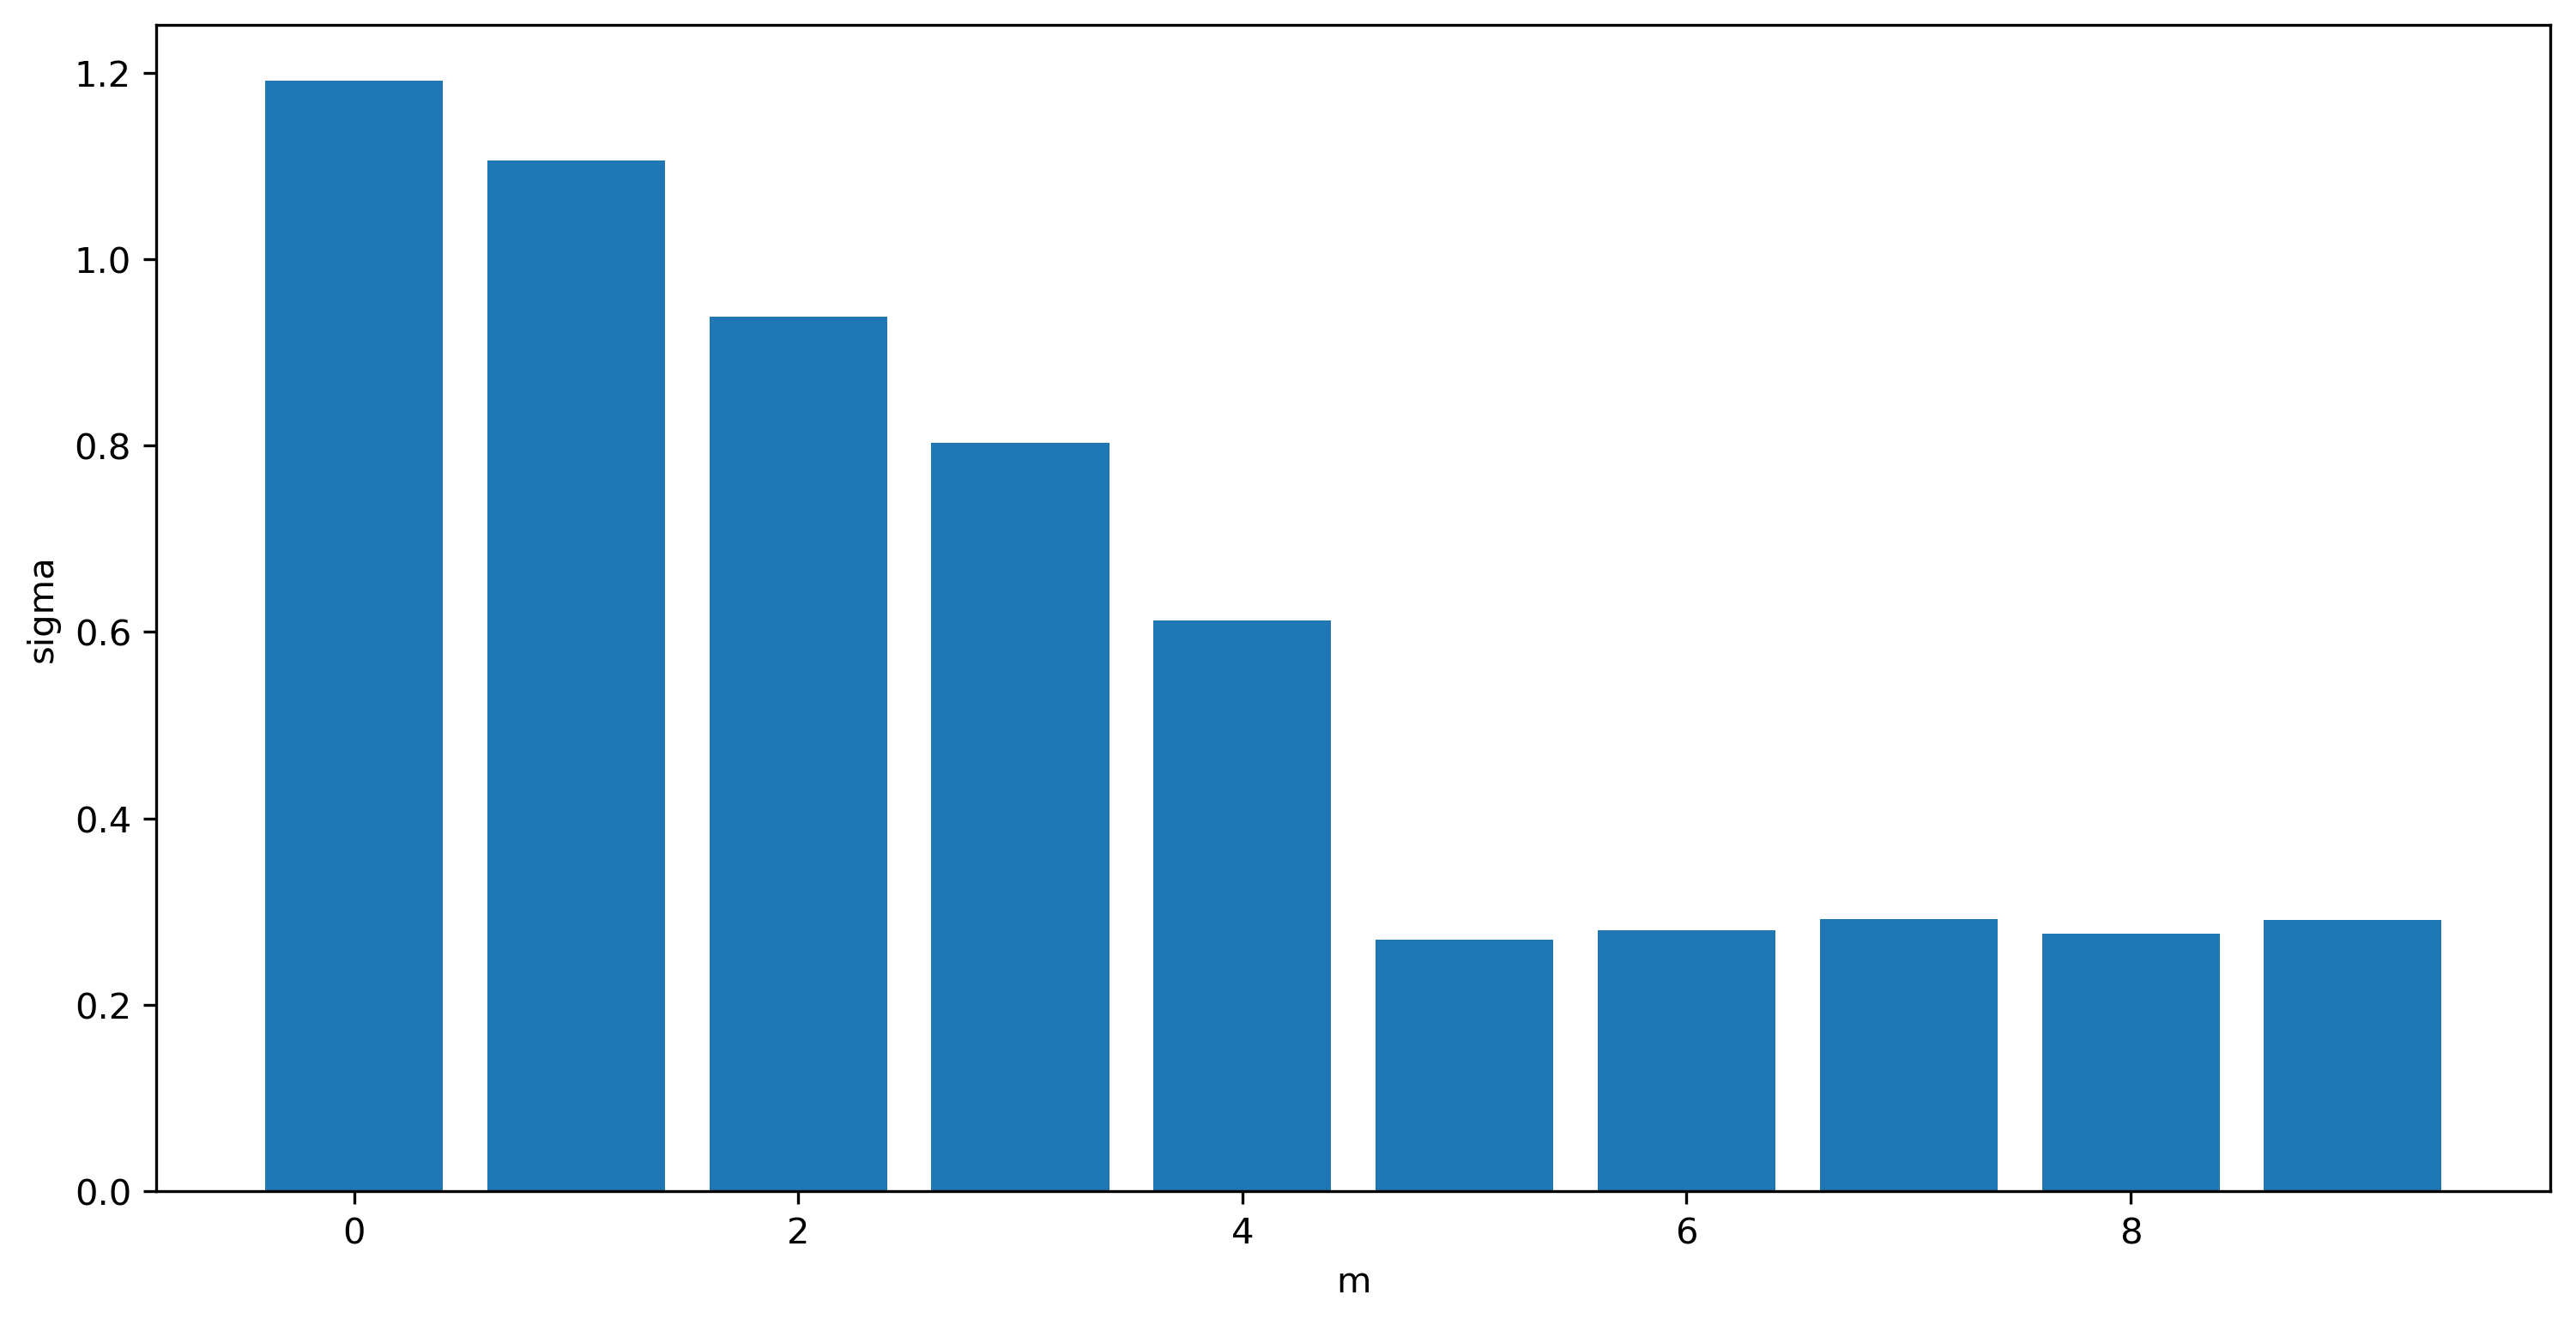

In [147]:
#3 Построить гистограмму зависимости σ_m от m, на основании которой выбрать оптимальную степень m*
##многочлена наилучшего среднеквадратичного приближения

plt.figure(figsize = (12, 6), dpi = 300)
plt.bar(m,sigma_list)
plt.xlabel('m')
plt.ylabel('sigma');

Из гистограммы можно заметить, что c $m=5$ значения $\sigma_m$ стабилизируются. Следовательно, оптимальное значение $m=m*=5$

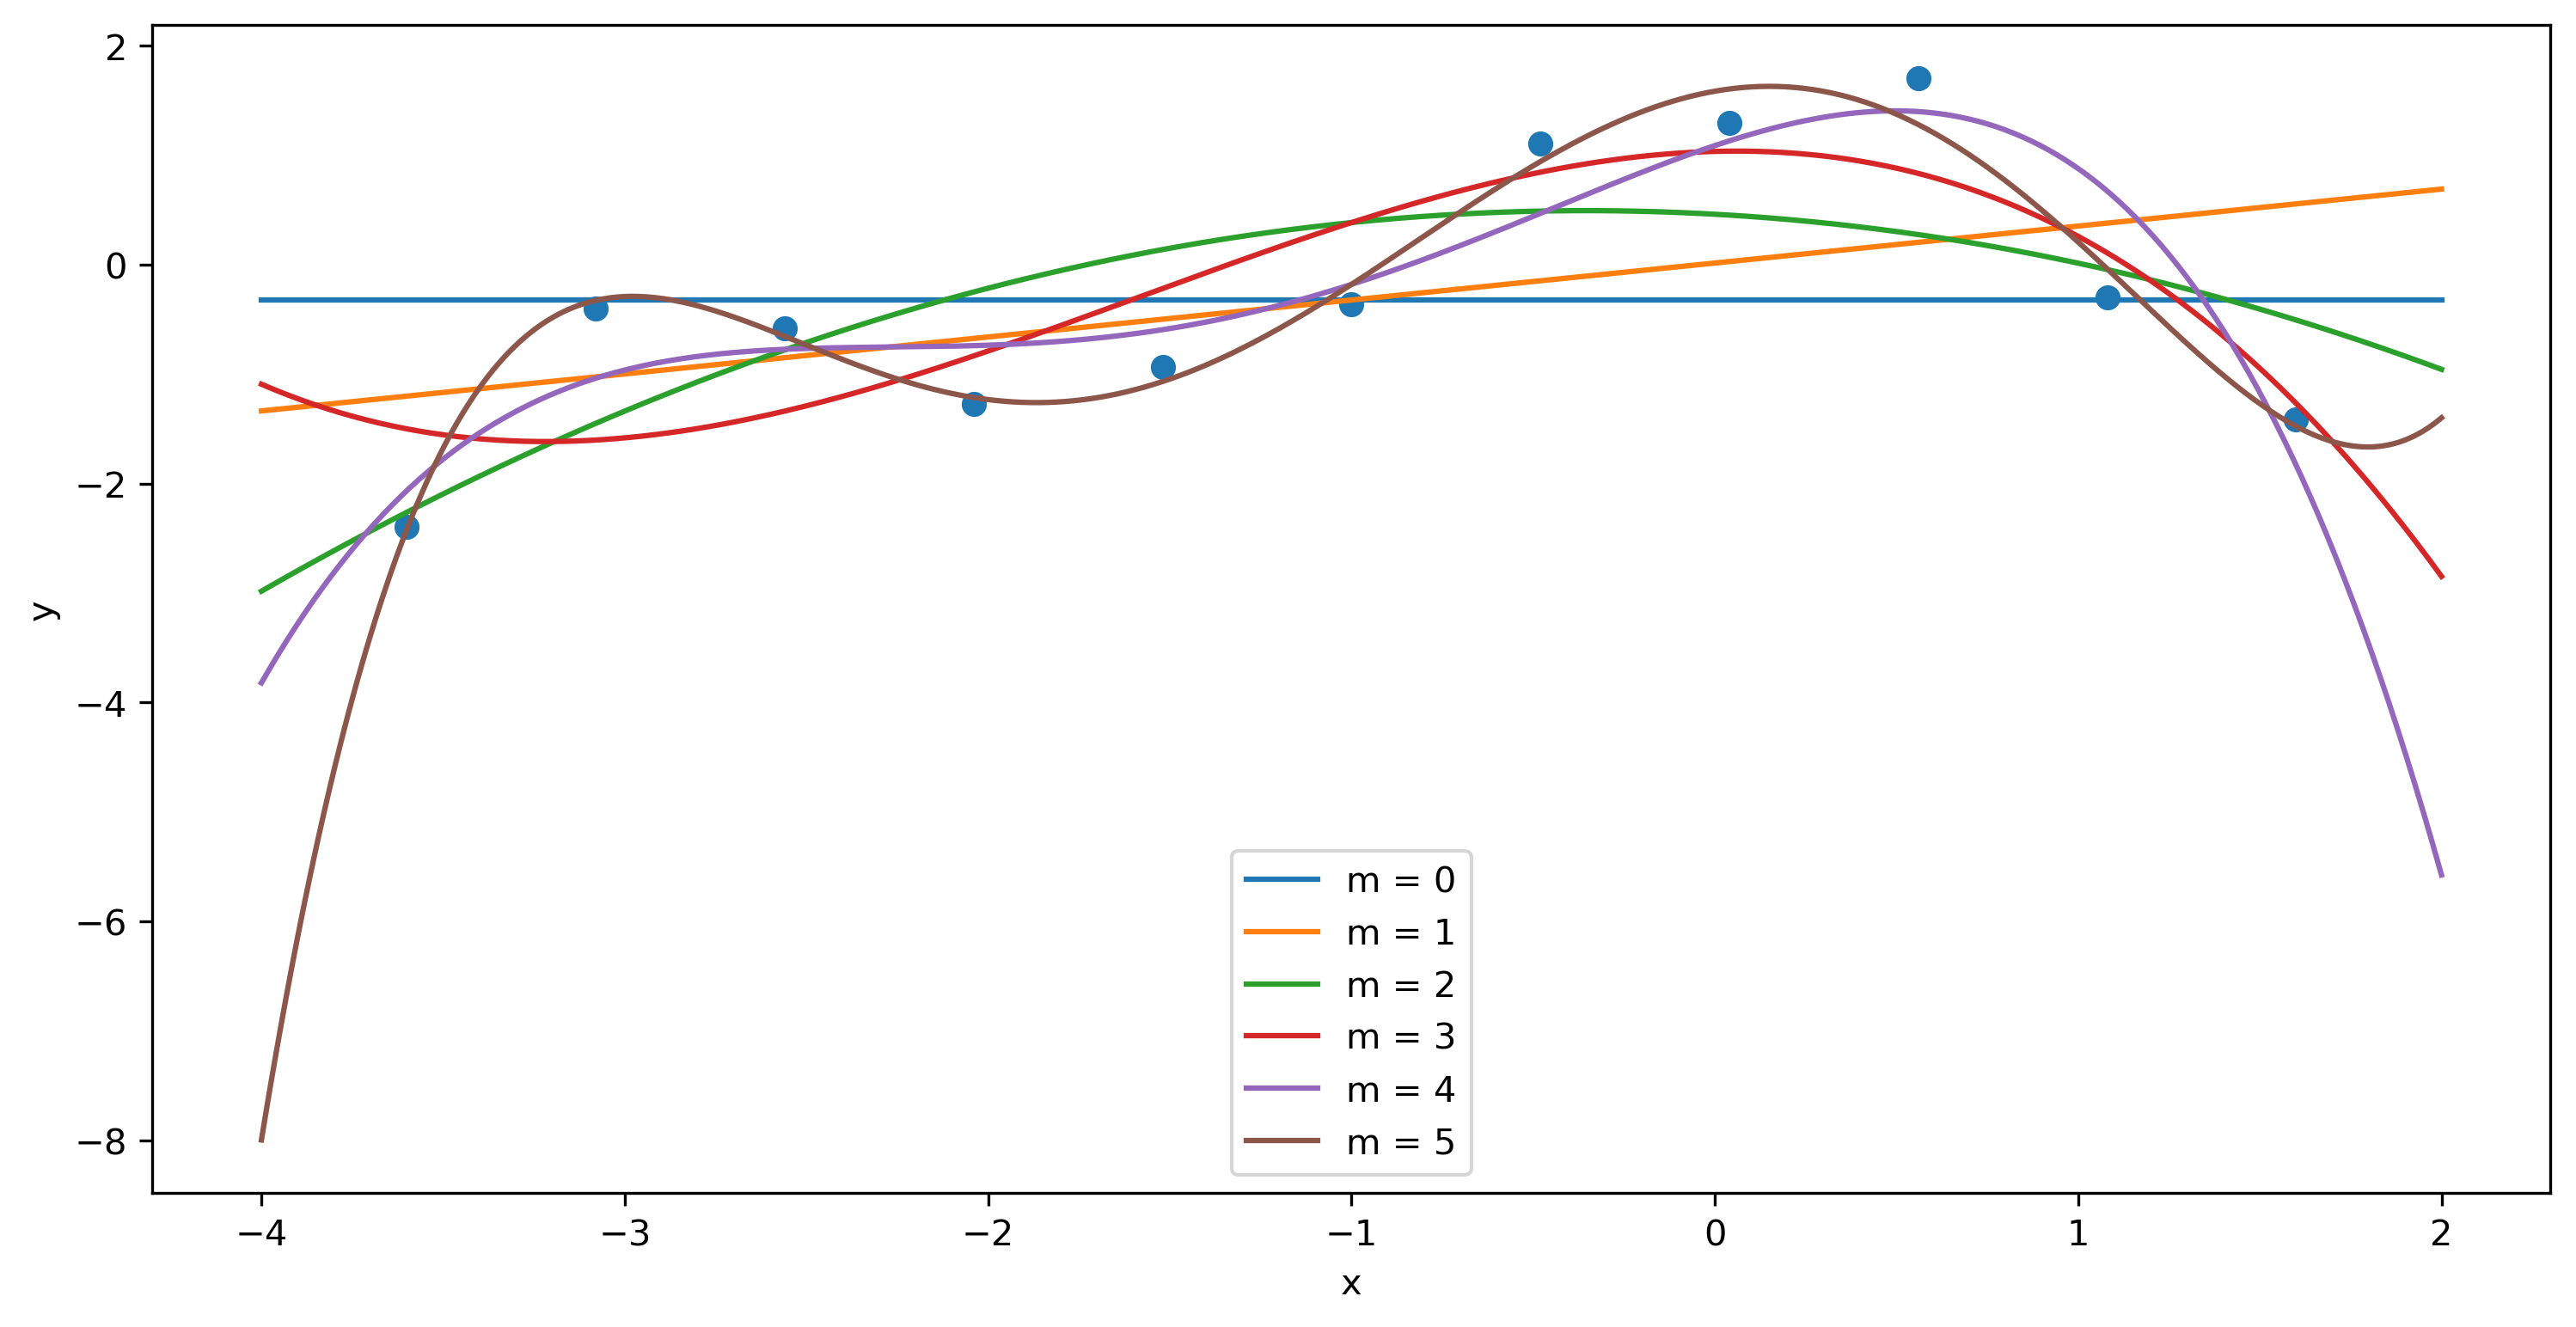

In [148]:
#4 На одном чертеже построить графики многочленов Pm, m=0,1,2,..., m*, и точечный график исходной функции.

m_optimal = 5
plt.figure(figsize = (12,6), dpi = 300)
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')

x_test = np.linspace(-4,2,500) #тестовые точки x 
for m_i in range(m_optimal+1): #будем строить многочлены степени от 0 до m*=5
    a=mnk(x,y,m_i) #находим набор коэф-тов 
    y_test=np.array([get_polynom(x_i,a) for x_i in x_test]) #получаем полином
    plt.plot(x_test,y_test,label='m = '+str(m_i))
plt.legend();

In [149]:
#5* Решить задачу МНК используя QR или SVD разложение, не формируя матрицу левой части нормальной 
#системы в явном виде. Использовать стандартные библиотечные средства линейной алгебры для матричных разложений. 
#Сравнить результаты полученные с помошью решения нормальной системы МНК и матричных разложений.

def mnk_QR(x,y,m): #Решим задачу, используя QR разложение 
    A=np.array([[x_i**i for i in range(m+1)] for x_i in x])
    Q,R=spl.qr(A)
    y_rot=Q.T@y
    return spl.solve_triangular(R[:m+1],y_rot[:m+1])

In [150]:
m = np.arange(10)
sigma_list_qr=[]

for m_i in m:
    a=mnk_QR(x,y,m_i)
    y_i=np.array([get_polynom(x_i,a) for x_i in x])
    sigma=np.sqrt(np.sum((y_i-y)**2)/(y.shape[0]-m_i))
    sigma_list_qr.append(sigma)

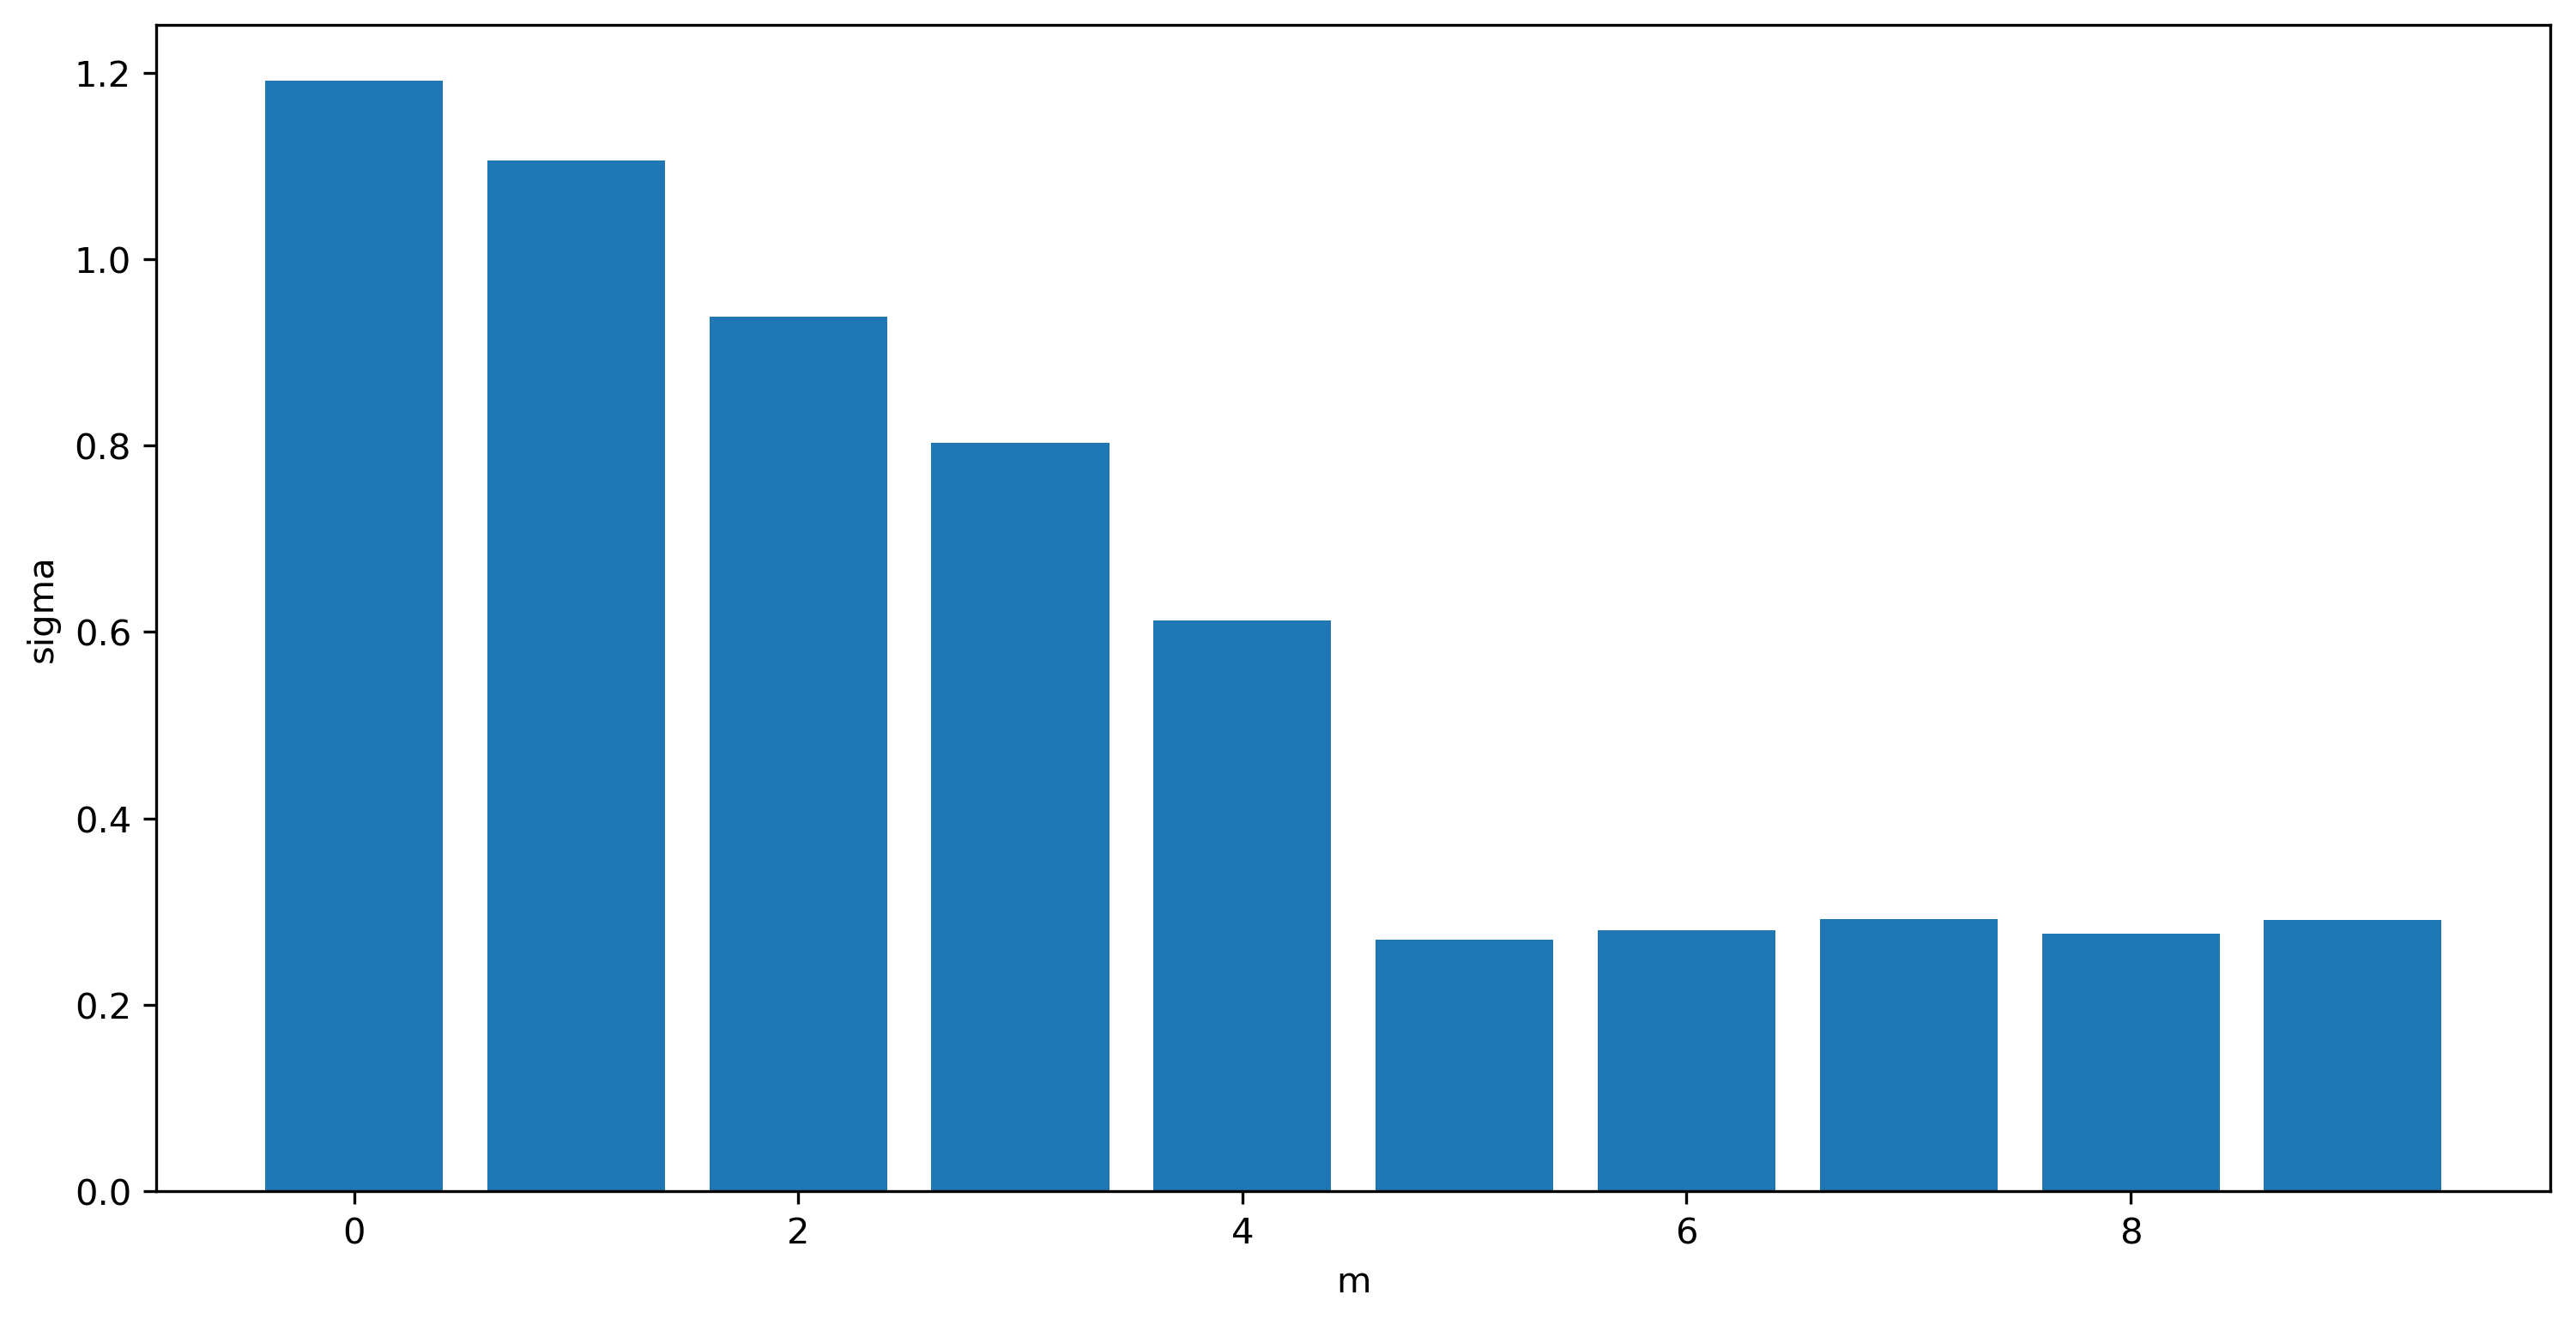

In [151]:
plt.figure(figsize = (12, 6), dpi = 300)
plt.bar(m,sigma_list_qr)
plt.xlabel('m')
plt.ylabel('sigma');

По гистограмме можно снова заметить, что оптимальным значением $m$ является $m*=5$

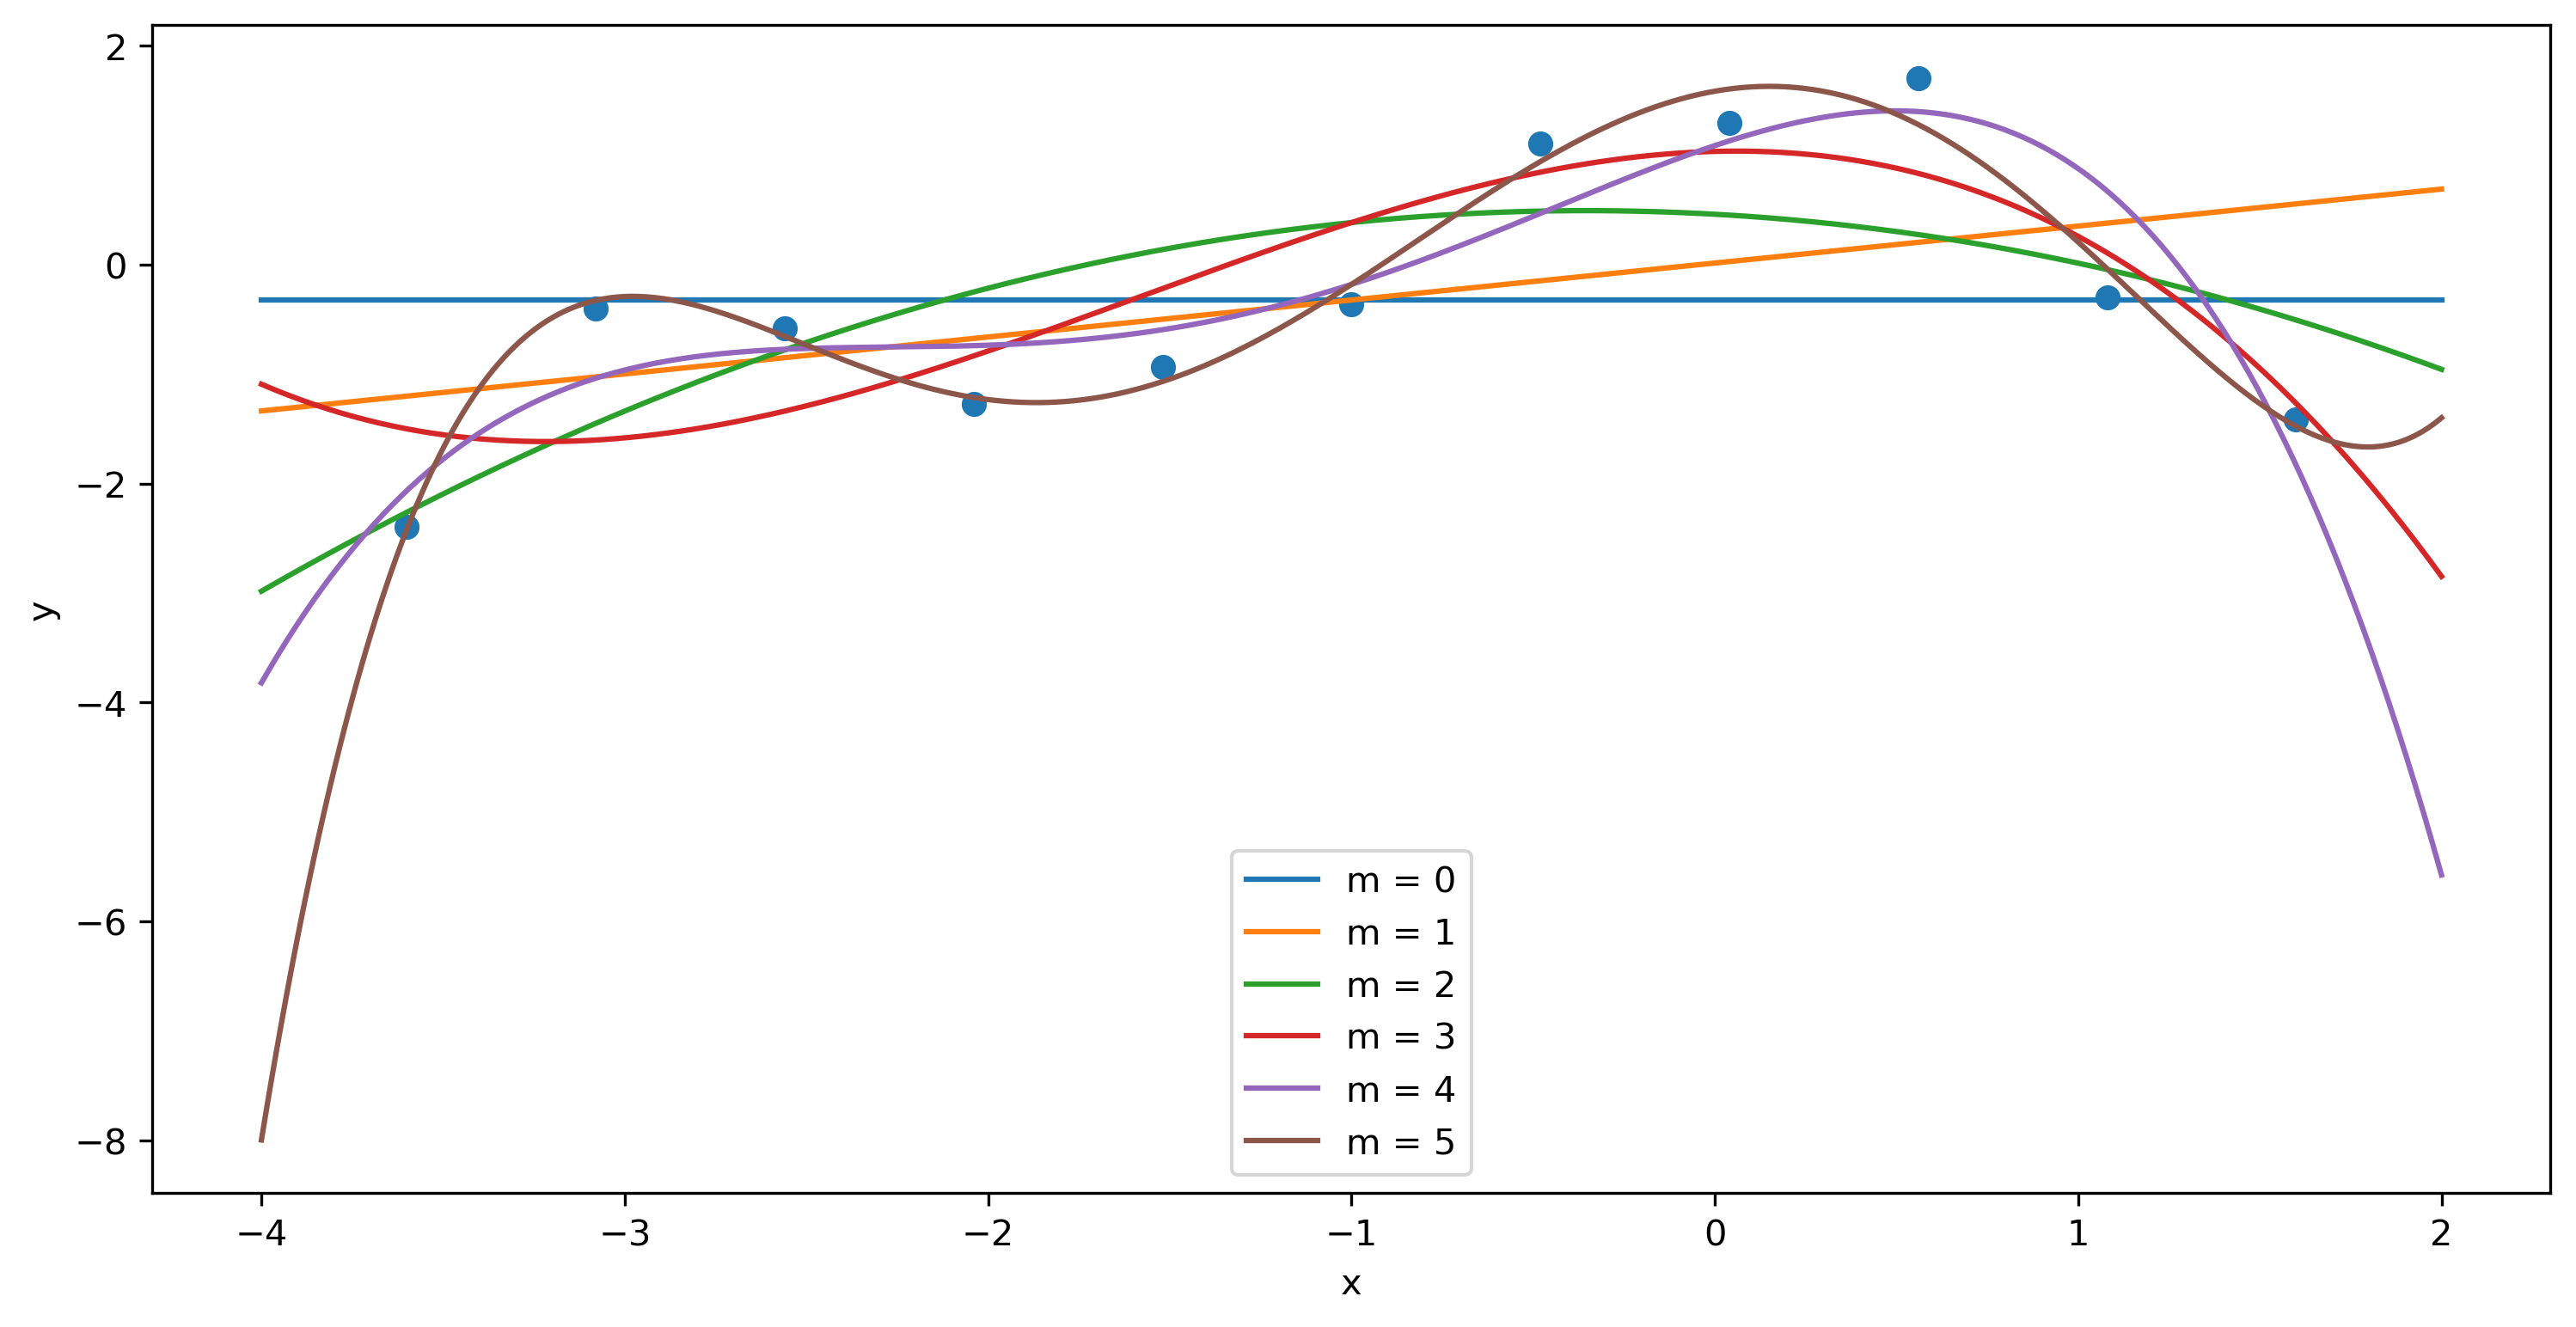

In [152]:
m_optimal_qr = 5
plt.figure(figsize = (12,6), dpi = 300)
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')


x_test = np.linspace(-4,2,500) 
for m_i in range(m_optimal_qr+1): 
    a=mnk(x,y,m_i) 
    y_test=np.array([get_polynom(x_i,a) for x_i in x_test]) 
    plt.plot(x_test,y_test,label='m = '+str(m_i))
plt.legend();


In [153]:
np.allclose(sigma_list, sigma_list_qr)

True

#### Вывод: 
Результаты, полученные с помошью решения нормальной системы МНК и QR разложения, совпадают. Оптимальное значение $m$, а также список $\sigma_m$  одинаковые в обоих случаях.

## Задача 5.4.2

В таблице приведены результаты наблюдений за движением материальной точки в плоскости $(x,y)$. Известно, что движение осуществляется по кривой, описываемой многочленом $y = kx^m + b$ (степень многочлена $m$ задана в индивидуальном варианте).Используя метод наименьших квадратов, определить коэффициенты $k$ и $b$. Определить значение $\overline{x}$ координаты $x$, соответствующее значению $\overline{y}$ координаты $y$ ($\overline{y}$
задано в индивидуальном варианте).


$m = 2 , \ \overline{y}=8,$
$ x = \begin{pmatrix}1.5 \\2.1\\2.7\\3.3\\3.9\\4.5\\5.1\end{pmatrix} $
$ y = \begin{pmatrix}11.1 \\10.3\\9.08\\7.64\\5.92\\3.90\\1.60\end{pmatrix} $

In [154]:
#1 Задать исходные данные 

x = np.array([1.5, 2.1, 2.7, 3.3, 3.9, 4.5, 5.1])
y = np.array([11.1, 10.3, 9.08, 7.64, 5.92, 3.90, 1.60])
m = 2
y_ = 8

In [155]:
#2 Составить в явном виде нормальную систему МНК
# Решить ее используя стандартные средства линейной алгебры

def base1(x): #базисная функция x^m
    return x**m

def base2(x): #базисная функция 1
    return 1

def mnk_2(x, y, base):
    A = np.array([[base_i(x_i) for base_i in base] for x_i in x])
    return npl.solve(A.T@A,A.T@y)
#Возвращает набор коэффициентов разложения функции по базисным векторам


In [156]:
a = mnk_2(x,y, [base1, base2]) #нашли коэффициенты 
print('Коэффициенты =', a)

Коэффициенты = [-0.40092166 12.02050691]


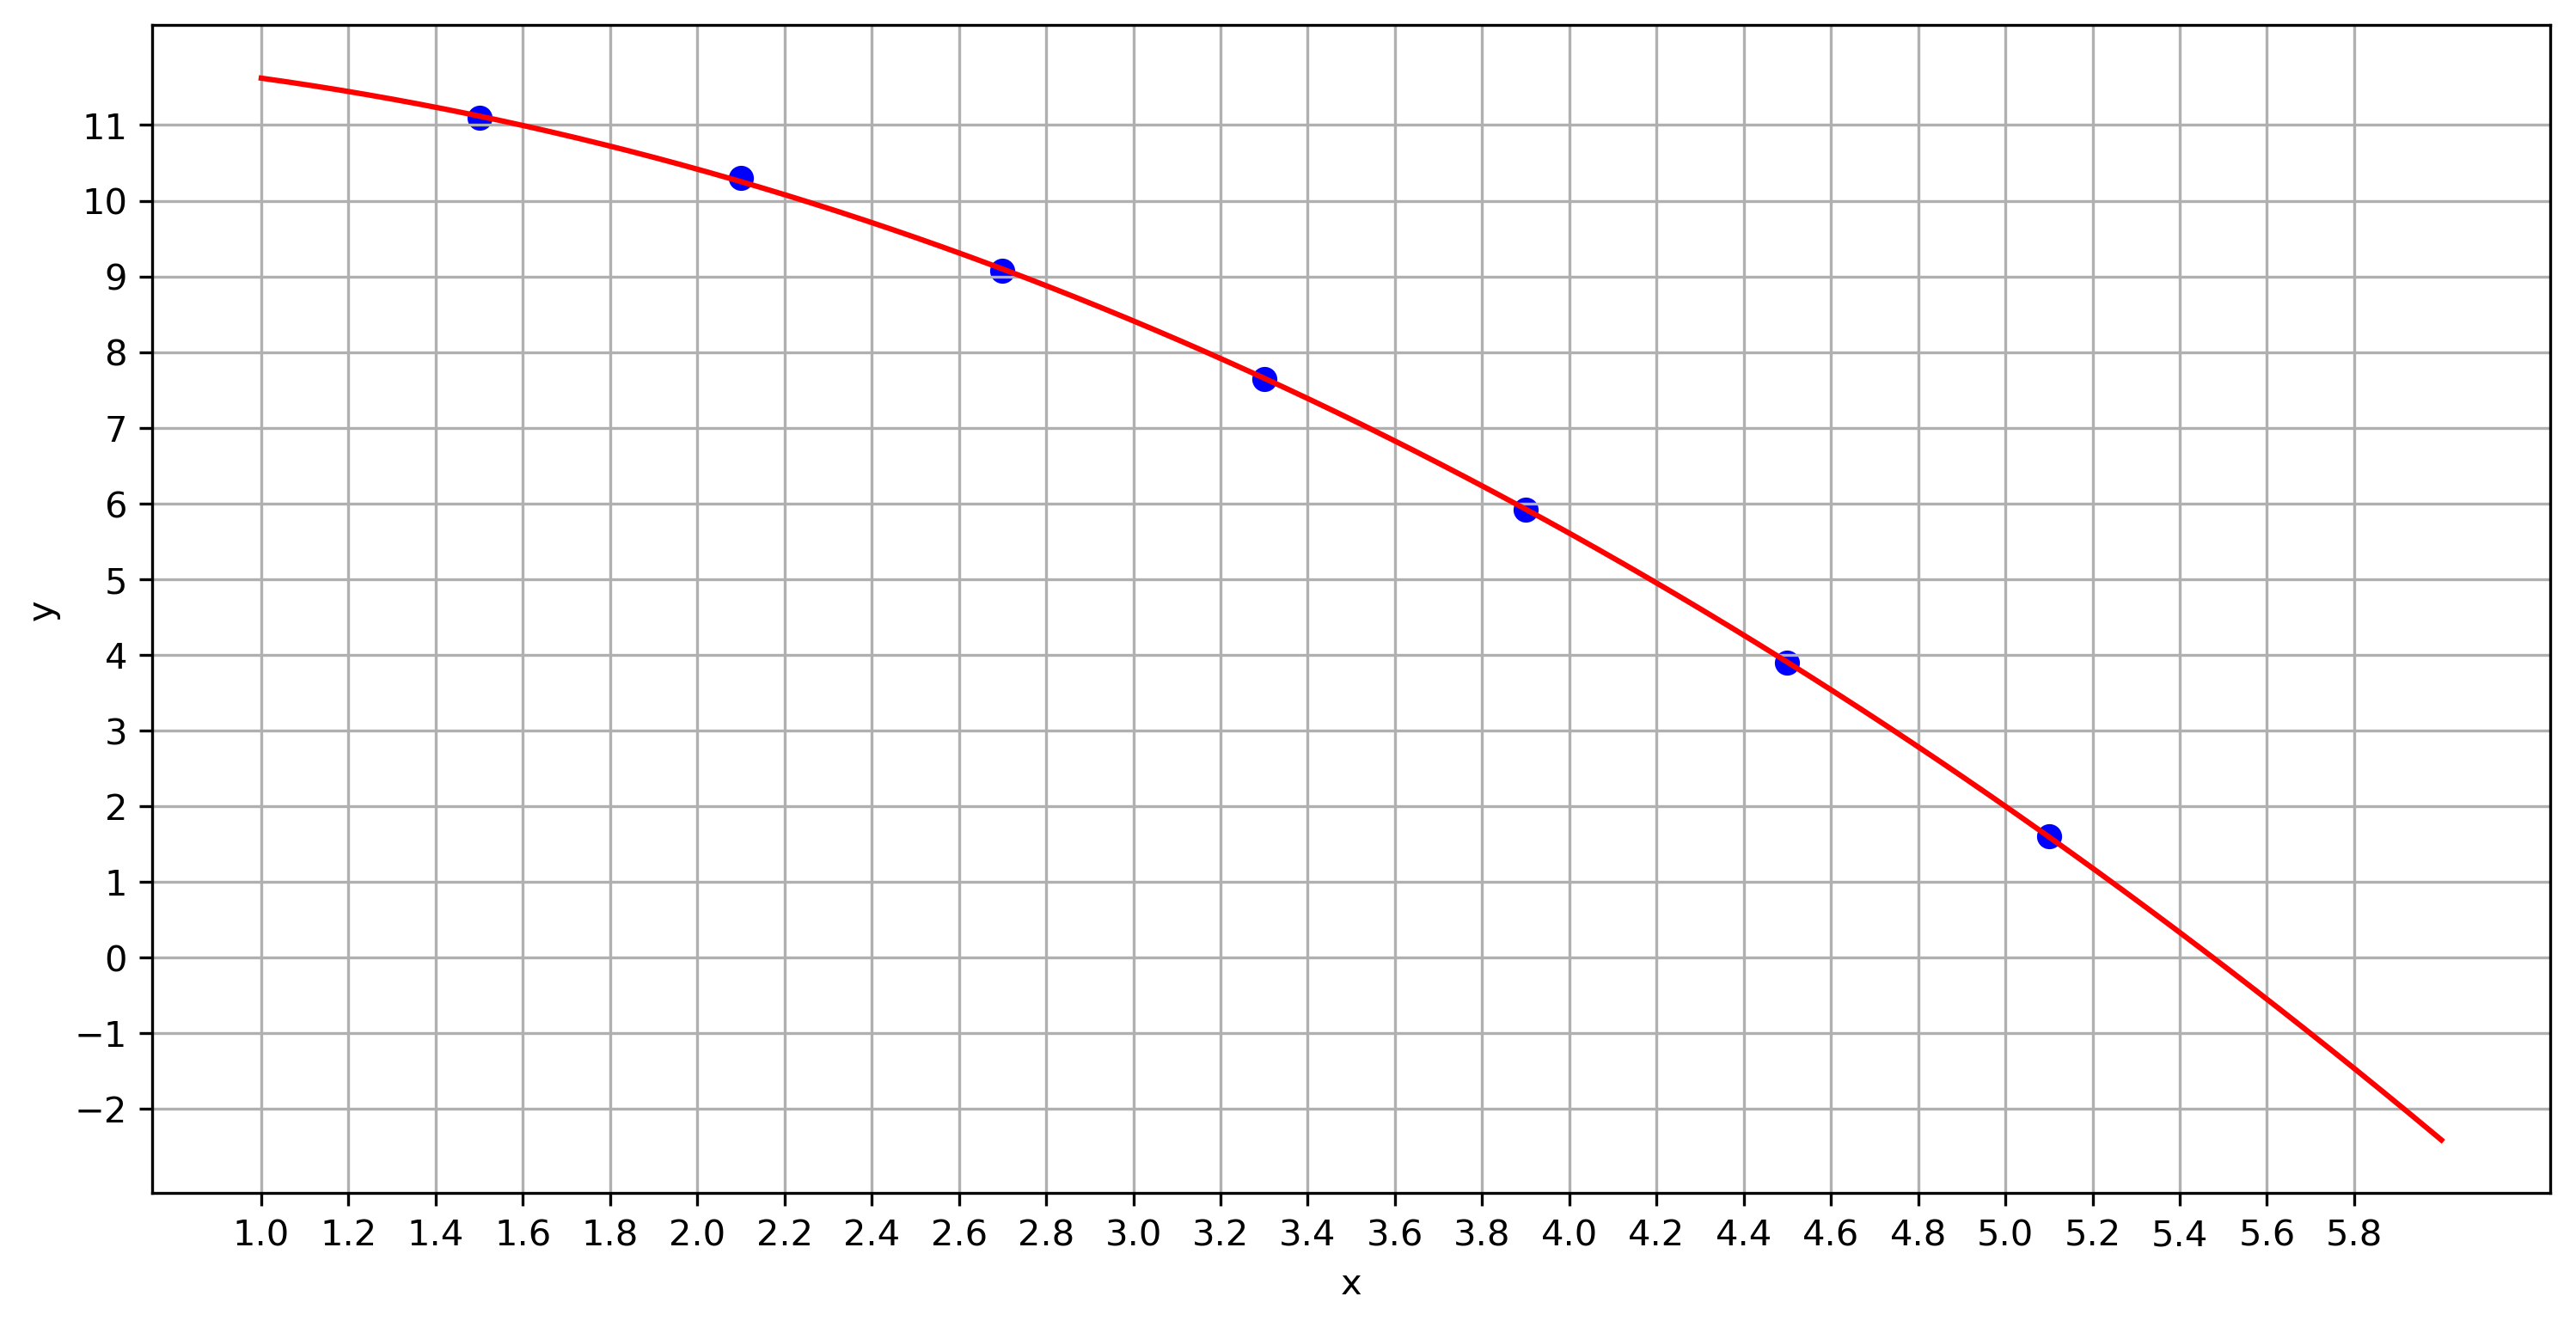

In [157]:
#3 График многочлена a[0]x^2+a[1]
plt.figure(figsize = (12,6), dpi=300)

plt.scatter(x,y, color = 'blue')
plt.xlabel('x')
plt.ylabel('y')
plt.xticks(np.arange(1,6,0.2))
plt.yticks(np.arange(-2,12,1))

x_test = np.linspace(1, 6, 500)
plt.plot(x_test, a[0] * base1(x_test) + a[1] * base2(x_test), color = 'red')
plt.grid();



In [158]:
#4 Найдем значение  x_, соответствующее значению y_=8
#Из предыдущего графика видно, что x_ примерно равен 3.2 , найдем точное решение
#Так как уравение имеет вид: a0(x_)^2+ a1 = y_, то x_ = +- sqrt((y_-a1)/a0)
x_ = np.sqrt((y_ - a[1])/a[0])
print('x_ = ', x_)

x_ =  3.1667271621565742


### Вывод: 
Значение $\overline{x}$ координаты $x$, соответствующее значению $\overline{y} = 8$ координаты $y$ равно $3.1667271621565742$

## Задача 5.7.5

Дана кусочно-гладкая функция $y=f(x)$. Сравнить качество приближения функции кусочно-линейной и глобальной интерполяциями.

$f(x) = |x-1|e^x , \ [a,b]  = [0,2]$

In [159]:
#1 Вычислить значения функции y_i = f (x_i ) в произвольных точках x_i , i=0,1,..., k-1, отрезка [a, b], по
#которым будет осуществляться интерполяция функции.


f = np.vectorize(lambda x: np.abs(x-1)*math.exp(x))
a = 0
b = 2
k = 7

x = np.linspace(a,b,k)
y = f(x)

In [160]:
#2 Составить программу-функцию, вычисляющую значение интерполяционного многочлена 1-ой степени 
# по точкам (xi,yi) и (xi+1,yi+1) в произвольной точке отрезка [xi,xi+1].
# С ее помощью вычислить приближенные значения функции f(x) при кусочно-линейной интерполяции 
#в 3k точках исходного отрезка [a,b].

def linear_interp(x_i, x, y):
    if x_i == x[0]:
        return y[0]
    i = 0
    while x_i > x[i]:
        i+=1
    return (y[i] - y[i-1]) / (x[i] - x[i-1]) * (x_i - x[i-1]) + y[i-1]

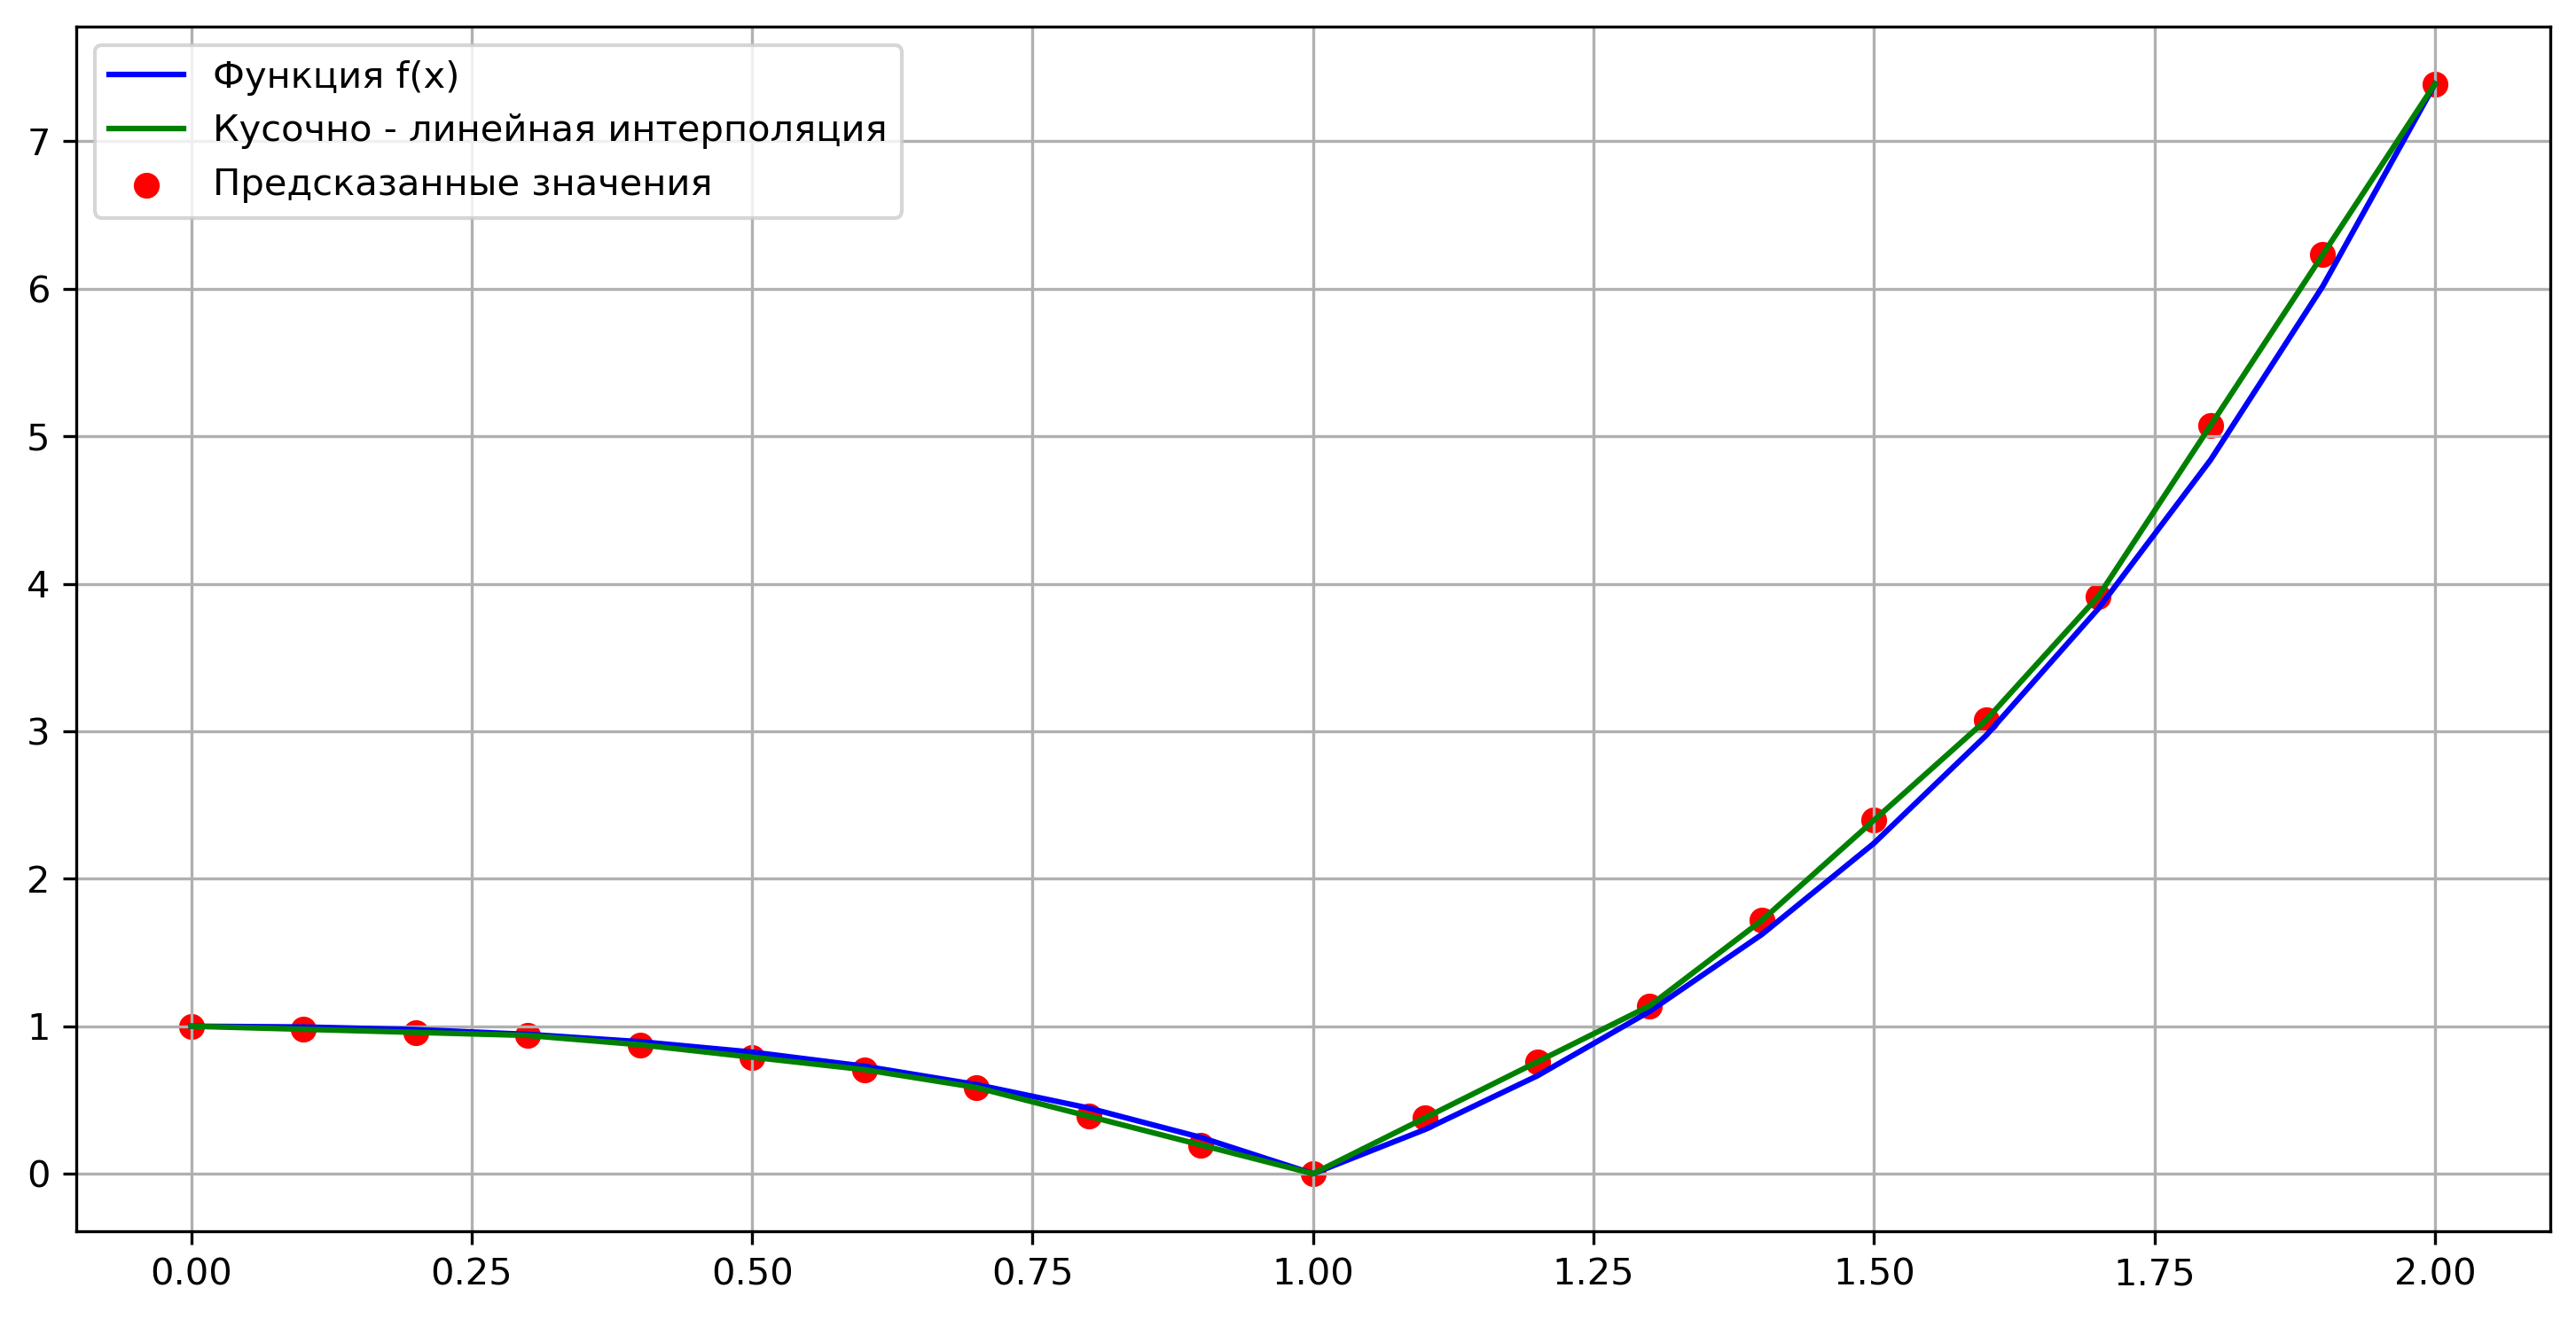

In [161]:
n = 3*k
x_3k = np.linspace(a,b,n) #выбираем новые 3k точек 
y_3k_lin = []
for x_i in x_3k:
    y_i = linear_interp(x_i,x,y) #предсказыаем значения в новых точках с кусочно-линейной интерполяции,
    y_3k_lin.append(y_i)             #построенной на точках x,y пункта 1 

plt.figure(figsize = (12,6), dpi=300)
plt.plot(x_3k,f(x_3k), color= 'blue', label='Функция f(x)')
plt.scatter(x_3k,y_3k_lin,color='red', label='Предсказанные значения')
plt.plot(x_3k,y_3k_lin ,color='green', label='Кусочно - линейная интерполяция')
plt.grid()
plt.legend();

In [162]:
#3 Вычислить приближенные значения функции f(x) в тех же 3k точках отрезка при глобальной интерполяции. 
# Для этого составить функцию, выполняющею построение интерполяционного многочлена в форме Ньютона 


class newton_polynom:
    def __init__(self,x,y):
        self.dif_matrix = np.zeros((len(x),len(x)))
        self.x = x.copy()
        for i in range(len(x)):
            self.dif_matrix[i][0] = y[i]
        for k in range(1, len(x)):
            for i in range(len(x) - k):
                self.dif_matrix[i][k] = (self.dif_matrix[i+1][k-1] - self.dif_matrix[i][k-1]) / (x[i+k] - x[i])
                
    def solve(self, x0):
        s = 0
        for i in range(len(self.x)):
            temp = self.dif_matrix[0][i]
            for k in range(i):
                temp *= x0 - self.x[k]
            
            s += temp
        return s

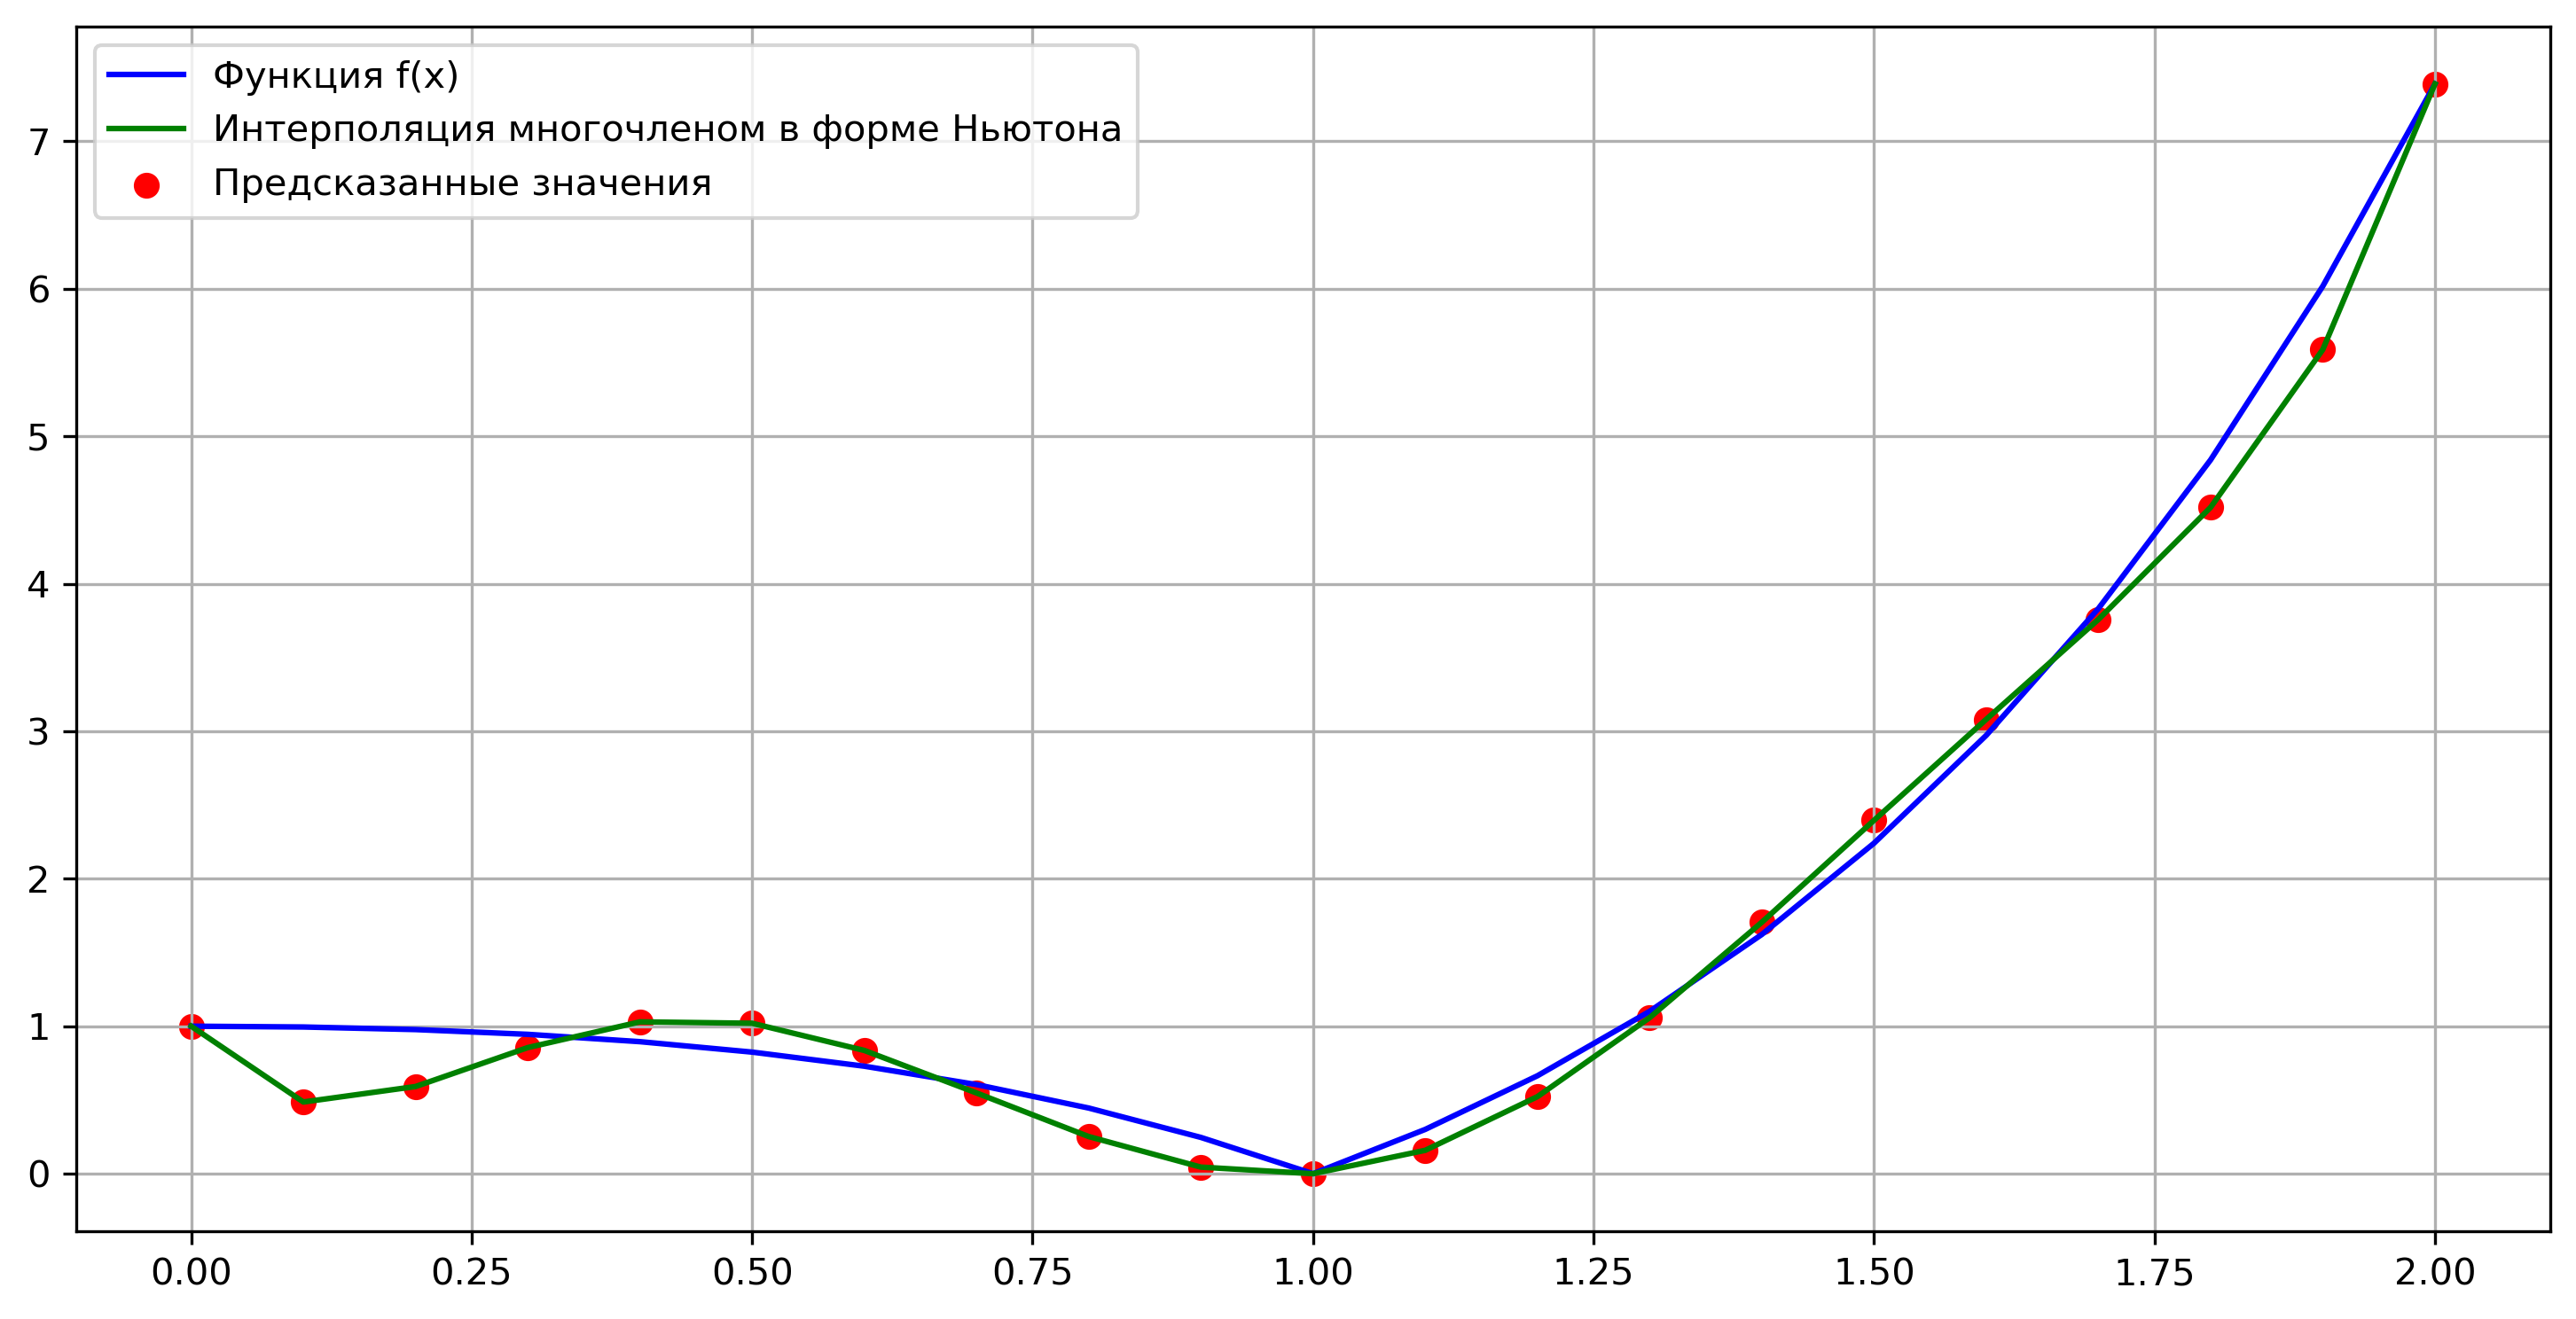

In [163]:
newton_interp = newton_polynom(x,y)
y_3k_newton = []

for x_i in x_3k:
    y_i = newton_interp.solve(x_i) #предсказыаем значения в 3k с помощью интерполяционного многочлена в форме Ньютона
    y_3k_newton.append(y_i)
    
plt.figure(figsize = (12,6), dpi=300)
plt.plot(x_3k,f(x_3k), color= 'blue', label='Функция f(x)')
plt.scatter(x_3k,y_3k_newton,color='red', label='Предсказанные значения')
plt.plot(x_3k,y_3k_newton,color='green', label='Интерполяция многочленом в форме Ньютона')
plt.grid()
plt.legend();

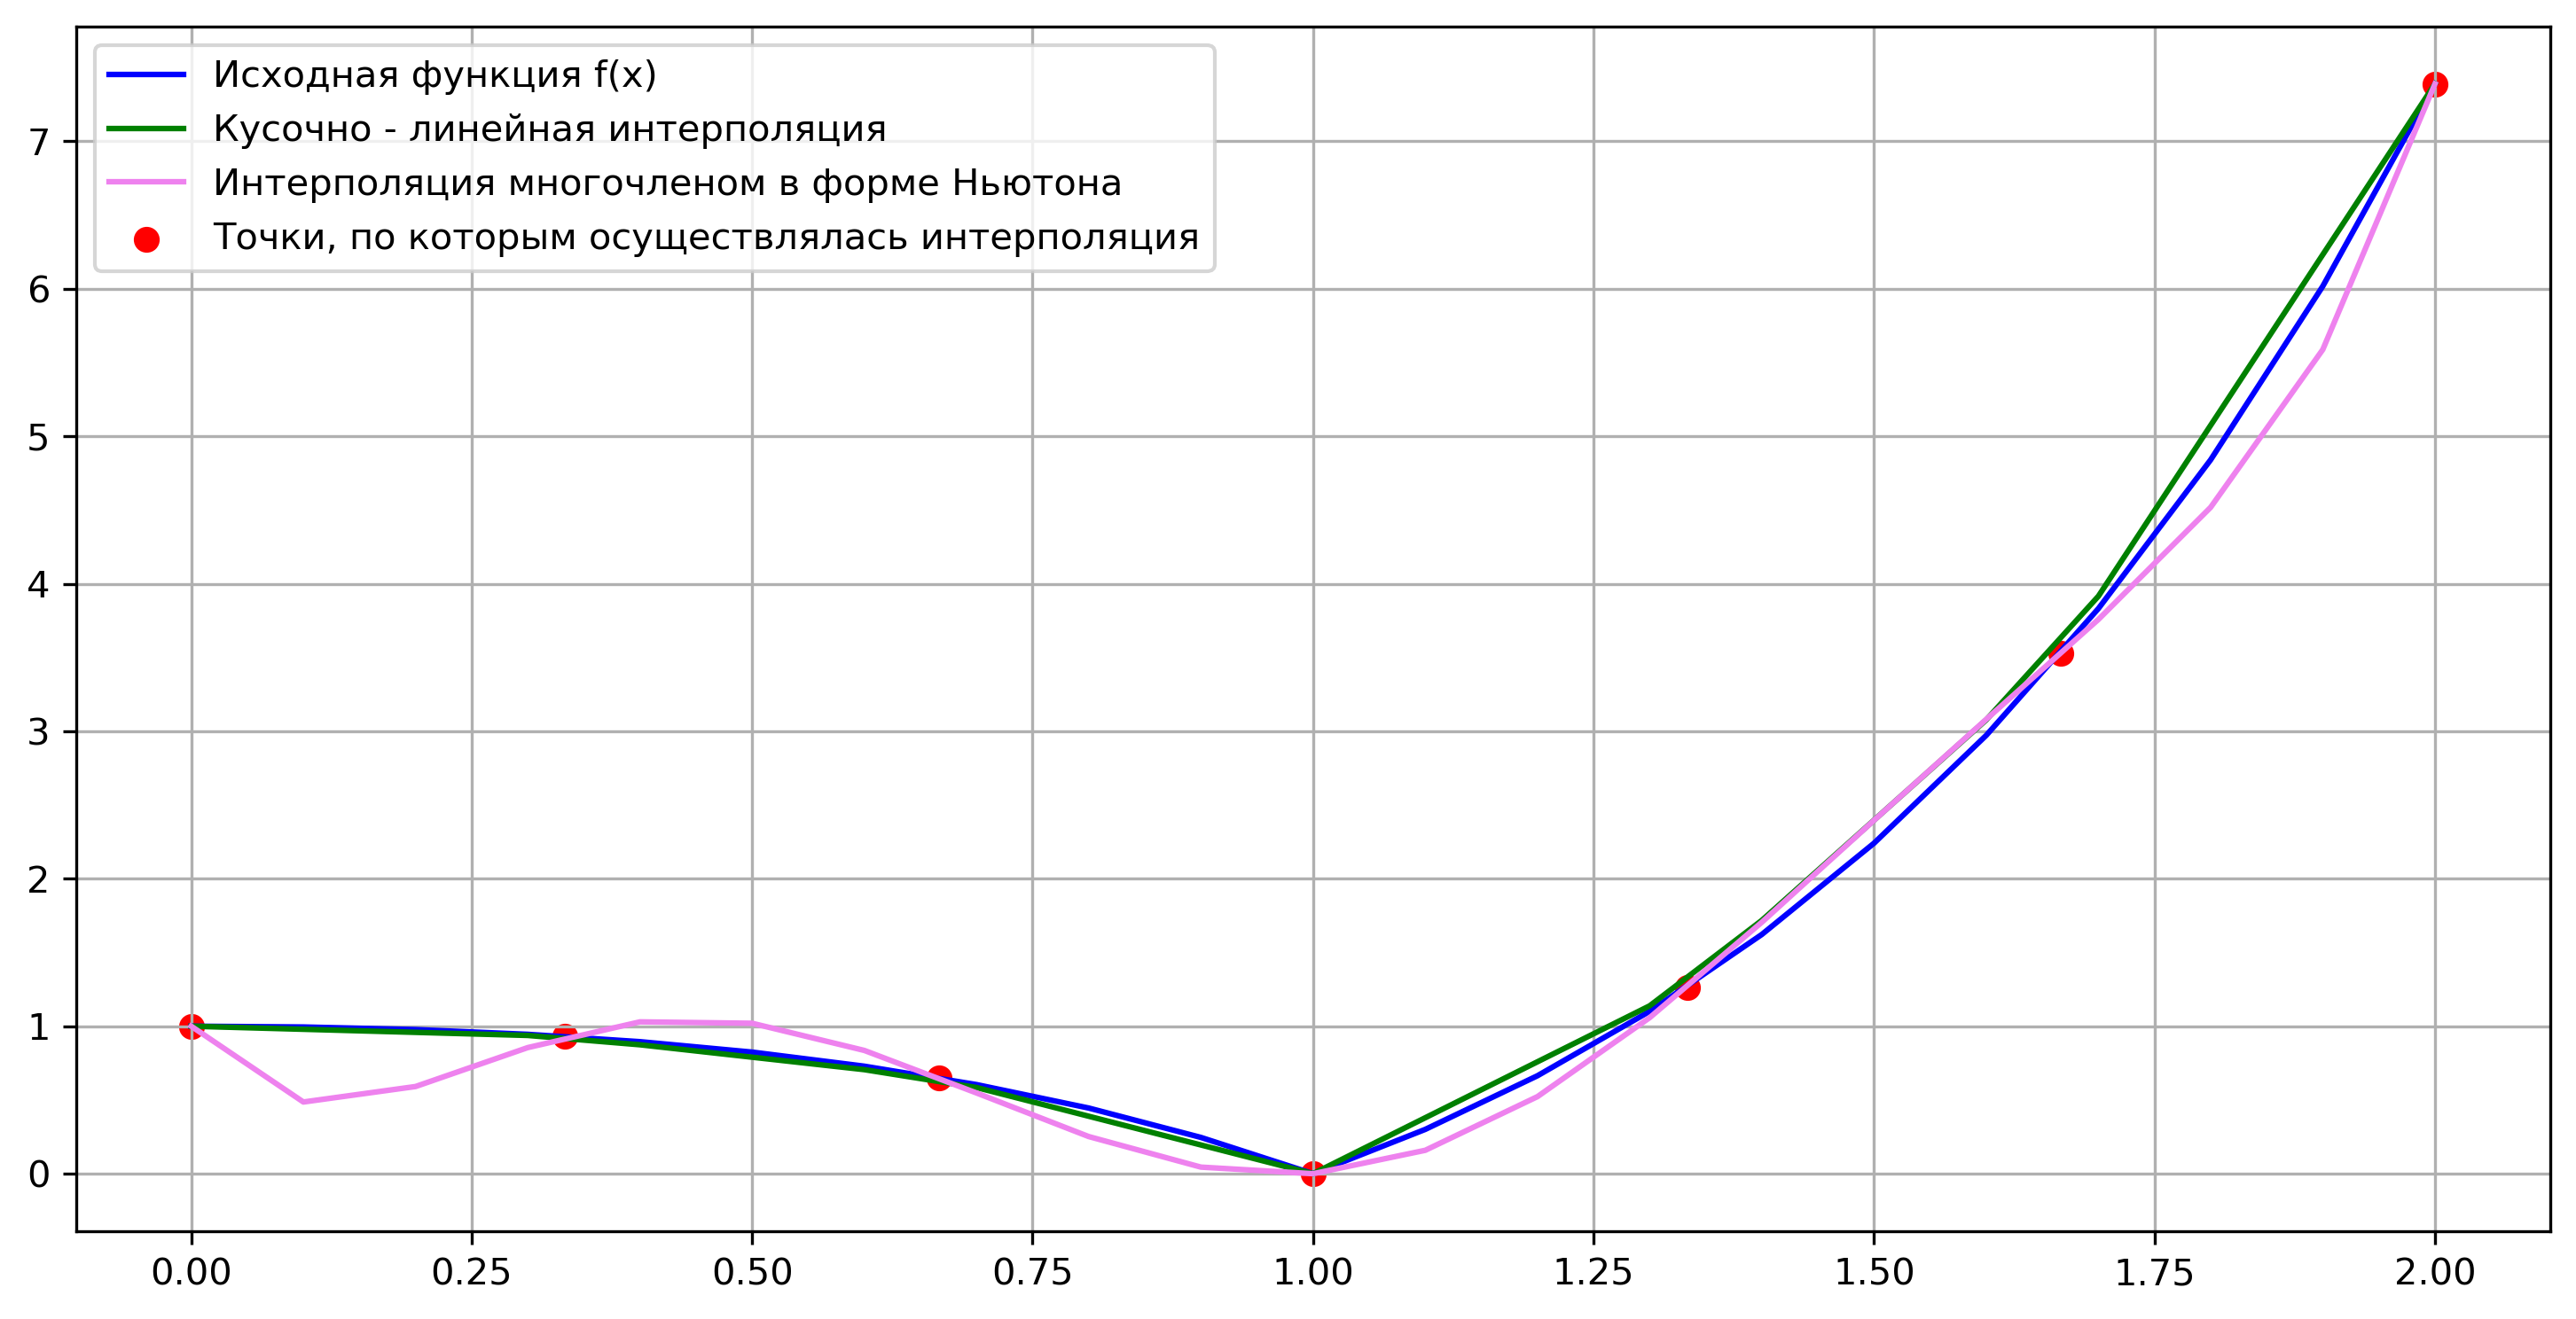

In [164]:
#4 На одном чертеже построить графики интерполирующих функций,график исходной функции f(x)
# а также отметить точки (xi , yi ) , i=0,1,...,k-1, по которым осуществлялась интерполяция.

plt.figure(figsize = (12,6), dpi=300)
plt.plot(x_3k,f(x_3k), color= 'blue', label='Исходная функция f(x)')
plt.scatter(x,y,color='red', label='Точки, по которым осуществлялась интерполяция')
plt.plot(x_3k,y_3k_lin ,color='green', label='Кусочно - линейная интерполяция')
plt.plot(x_3k,y_3k_newton,color='violet', label='Интерполяция многочленом в форме Ньютона')
plt.grid()
plt.legend();


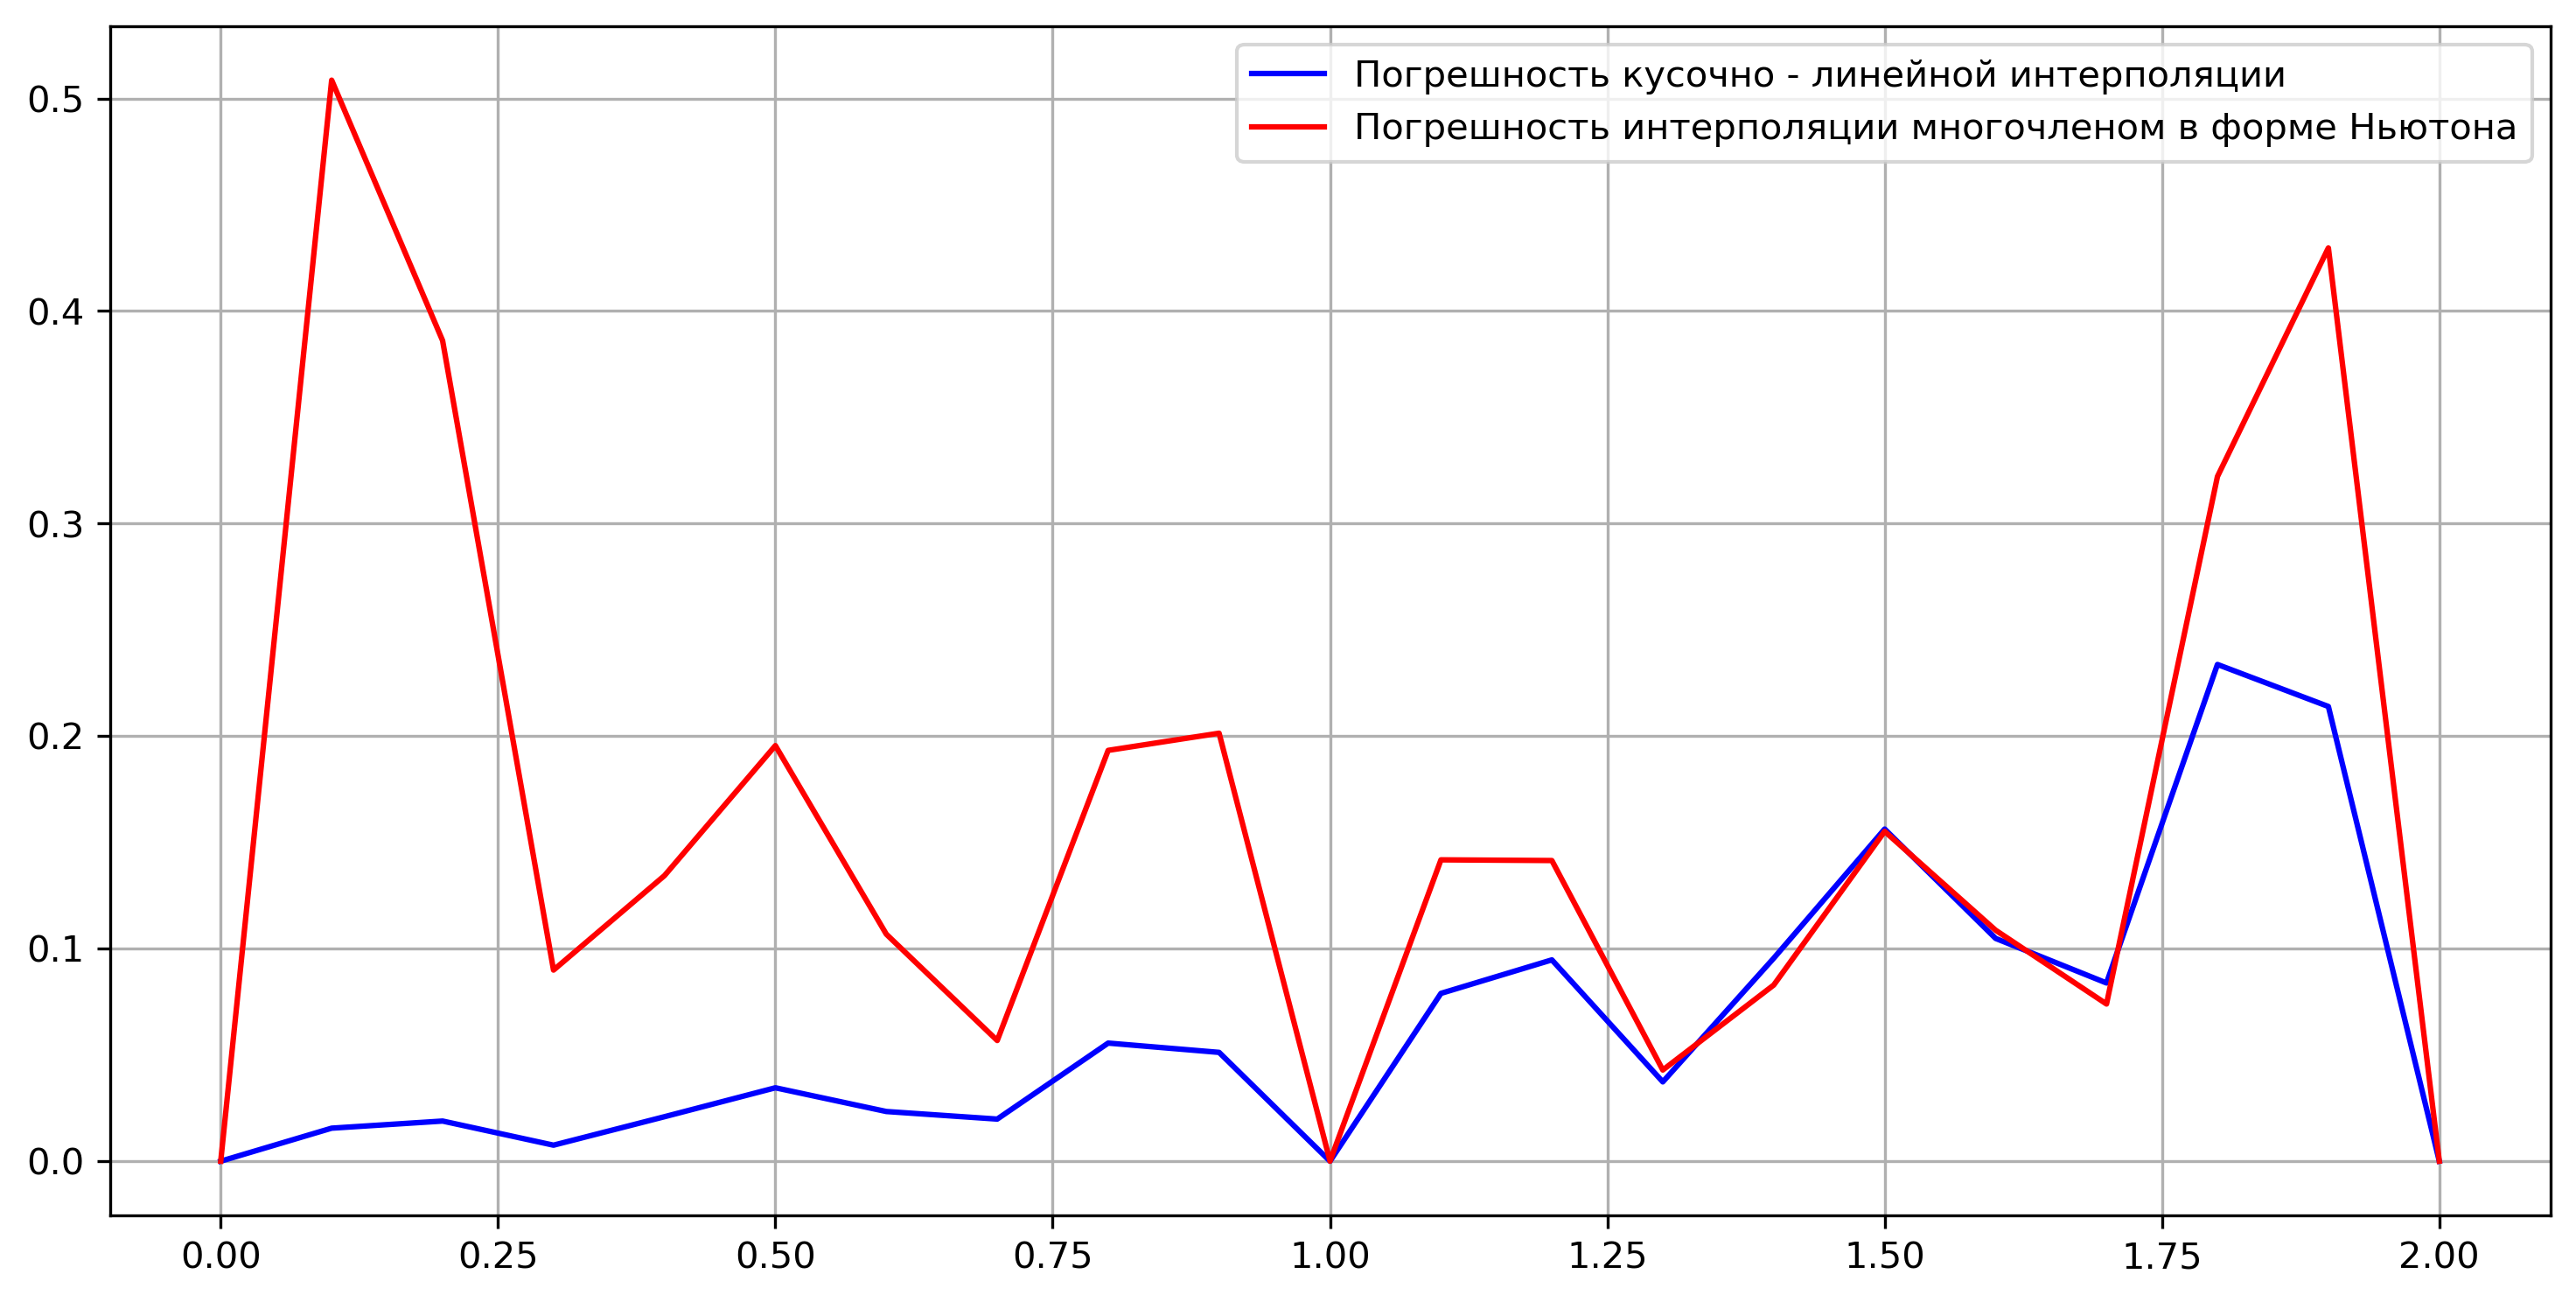

In [165]:
#5 Вычислить практическую величину погрешностей приближения функции f(x) в 3k точках
# для кусочно-линейной и глобальной интерполяций. 
#На одном чертеже построить графики погрешностей. Сравнить качество приближения.

y_3k = f(x_3k) #реальные значения в 3k точках 
error_lin = np.abs(y_3k_lin - y_3k)
error_newton = np.abs(y_3k_newton - y_3k)

plt.figure(figsize = (12,6), dpi=300)
plt.plot(x_3k,error_lin,color='blue', label='Погрешность кусочно - линейной интерполяции')
plt.plot(x_3k,error_newton,color='red', label='Погрешность интерполяции многочленом в форме Ньютона')
plt.grid()
plt.legend();

### Вывод: 
Кусочно - линейная интерполяция имеет практическую погрешность вычислений $\underline{ниже}$, чем итерполяция многочленом в форме Ньютона.

## Задача 5.9.5 

Дана функция $y=f(x)$. Приблизить $f(x)$ на отрезке $[a, b]$ методом глобальной интерполяции и указанным в индивидуальном варианте сплайном. На одном чертеже построить графики приближающей функции и функции $f(x)$. Сравнить качество приближения при разном количестве узлов интерполяции.


$f(x) = 10 \displaystyle \frac{\cos{(x^3)}}{x} , \ [a, b] = [1, 2.75]$\
Сплайн : кубический дефекта 1

In [176]:
f = np.vectorize(lambda x: 10* math.cos(x**3)/x)
a = 1
b = 2.75

x = np.linspace(a,b,50)
y = f(x)

In [177]:
#1 Класс кубического сплайна 
# Можно использовать функцию scipy.interpolate.CubicSpline
class cubic_spline:
    
    def __init__(self):
        self.predict = np.vectorize(self.predict)
        
    def fit(self, x_grid, y_grid): # построение кубического многочлена 
        self.x_grid = x_grid
        self.y_grid = y_grid

        h_grid = x_grid[1:] - x_grid[:-1]
        d_grid = (y_grid[1:] - y_grid[:-1]) / h_grid

        d = np.array([h_grid[1]])
        d = np.append(d, 2 * (h_grid[:-1] + h_grid[1:]))
        d = np.append(d, np.array([h_grid[-2]]))

        d_l = np.copy(h_grid[:-1])
        d_l = np.append(d_l, -(h_grid[-1] + h_grid[-2]))

        d_ll = np.zeros(x_grid.shape[0]-3)
        d_ll = np.append(d_ll, h_grid[-1])

        d_u = np.array([-(h_grid[0] + h_grid[1])])
        d_u = np.append(d_u, h_grid[1:])

        d_uu = np.array([h_grid[0]])
        d_uu = np.append(d_uu, np.zeros(x_grid.shape[0]-3))

        A = np.diag(d) + np.diag(d_u, 1) + np.diag(d_uu, 2) + np.diag(d_l, -1) + np.diag(d_ll, -2)

        b = np.array([0])
        b = np.append(b, 6 * (d_grid[1:] - d_grid[:-1]))
        b = np.append(b, np.array([0]))

        self.m = np.linalg.solve(A, b)

        self.s0 = y_grid[:-1]
        self.s1 = d_grid - h_grid / 6 * (2 * self.m[:-1] + self.m[1:])
        self.s2 = self.m[:-1] / 2
        self.s3 = (self.m[1:] - self.m[:-1]) / (6 * h_grid)
         
    def predict(self, x): #предсказывание значения в точке x
        ind = np.where(x < self.x_grid)[0]
        if ind.shape[0] != 0:
            ind = ind[0]
            if ind != 0:
                ind = ind - 1
        else:
            ind = self.s0.shape[0] - 1

        return self.s0[ind] + self.s1[ind] * (x - self.x_grid[ind]) + self.s2[ind] * (x - self.x_grid[ind])**2 + self.s3[ind] * (x - self.x_grid[ind])**3

In [178]:
#2 Вычислим значения функции в тестовых точках с помощью сплайна и интерполяции многочленом Ньютона 

spline = cubic_spline()
spline.fit(x,y) #построение кубического сплайна на исходных точках 

newton_interp = newton_polynom(x,y) #построении интерполяции многочленом в форме Ньютона на исходных точках

X = np.linspace(a,b, 500) # выбираем  новые тестовые точки 
Y = f(X) #реальных значения в тестовых точках
Y_spline = spline.predict(X) #значения в тестовых точках, найденные кубическим сплайном
Y_newton = newton_interp.solve(X) #значения в тестовых точках, найденные интерполяцией многочленом в форме Ньютона

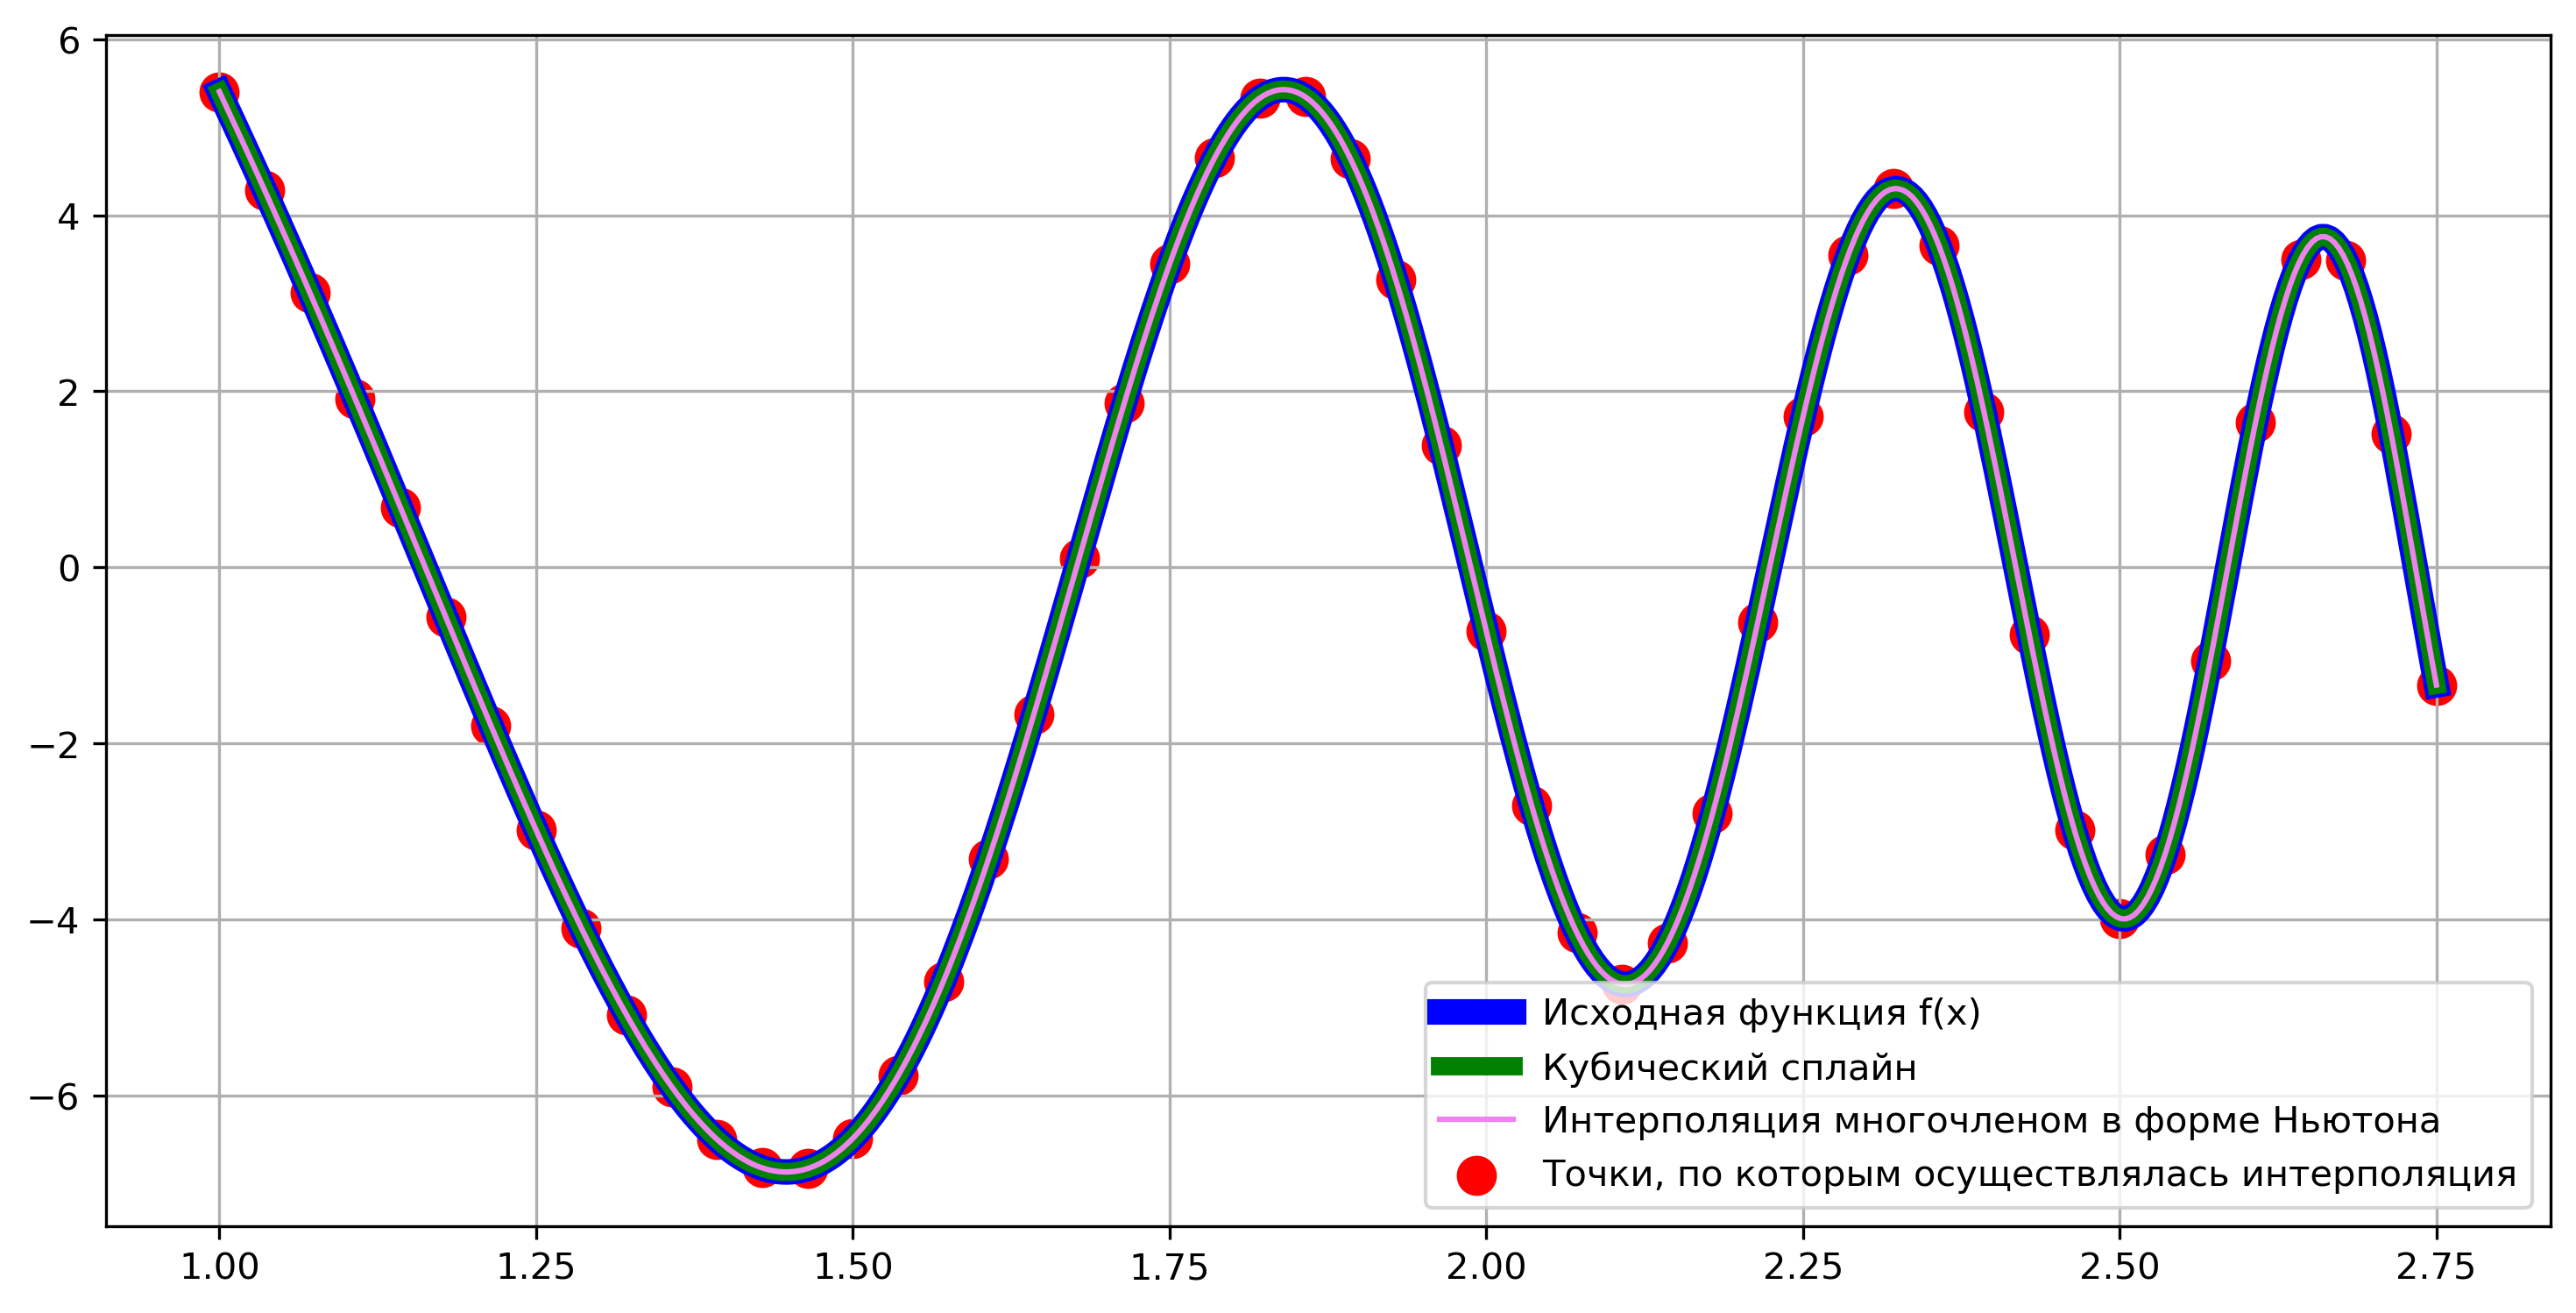

In [199]:
#3 На одном чертеже построим графики интерполирующих функций,график исходной функции f(x)
# а также отметить точки, по которым осуществлялась интерполяция.

plt.figure(figsize = (12,6), dpi=300)
plt.plot(X,Y, color= 'blue', label='Исходная функция f(x)', linewidth =7)
plt.scatter(x,y,color='red', label='Точки, по которым осуществлялась интерполяция', linewidth =5)
plt.plot(X,Y_spline ,color='green', label='Кубический сплайн', linewidth = 5)
plt.plot(X,Y_newton,color='violet', label='Интерполяция многочленом в форме Ньютона')
plt.grid()
plt.legend();

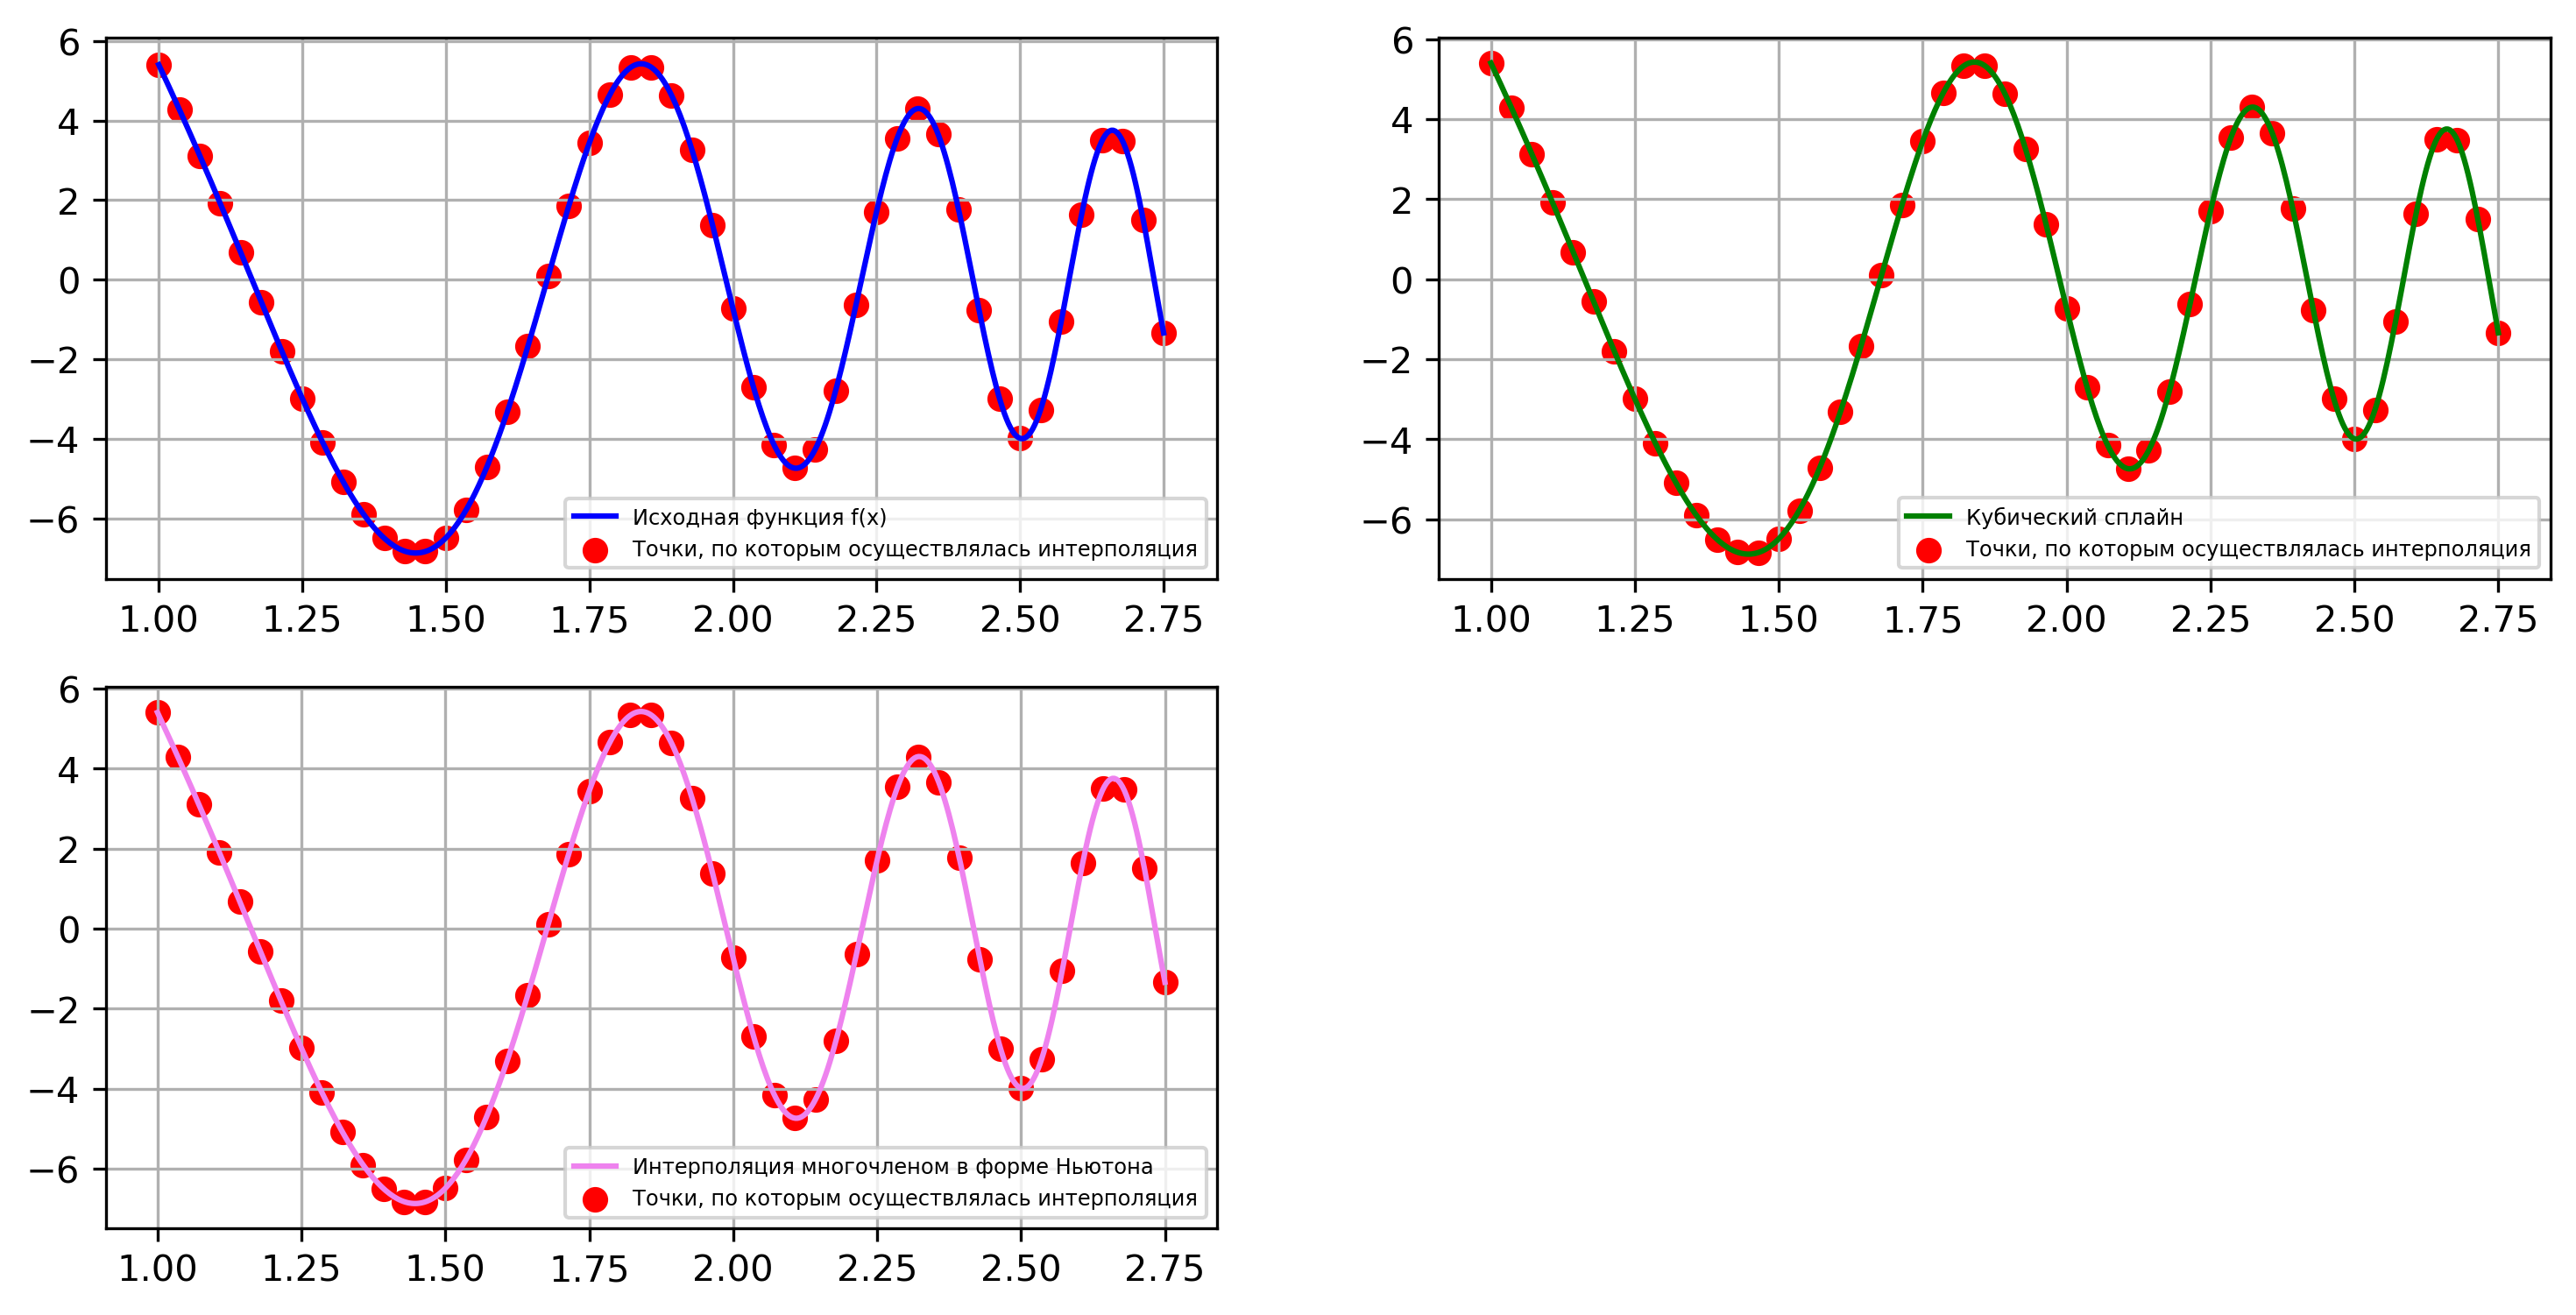

In [210]:
plt.figure(figsize = (12,6), dpi=300)

plt.subplot(221)
plt.plot(X,Y, color= 'blue', label='Исходная функция f(x)')
plt.scatter(x,y,color='red', label='Точки, по которым осуществлялась интерполяция')
plt.grid()
plt.legend(loc ='lower right', fontsize = 'xx-small')

plt.subplot(222)
plt.scatter(x,y,color='red', label='Точки, по которым осуществлялась интерполяция')
plt.plot(X,Y_spline ,color='green', label='Кубический сплайн')
plt.grid()
plt.legend(loc ='lower right', fontsize = 'xx-small')

plt.subplot(223)
plt.scatter(x,y,color='red', label='Точки, по которым осуществлялась интерполяция')
plt.plot(X,Y_newton,color='violet', label='Интерполяция многочленом в форме Ньютона')
plt.grid()
plt.legend(loc ='lower right', fontsize = 'xx-small')


plt.show()

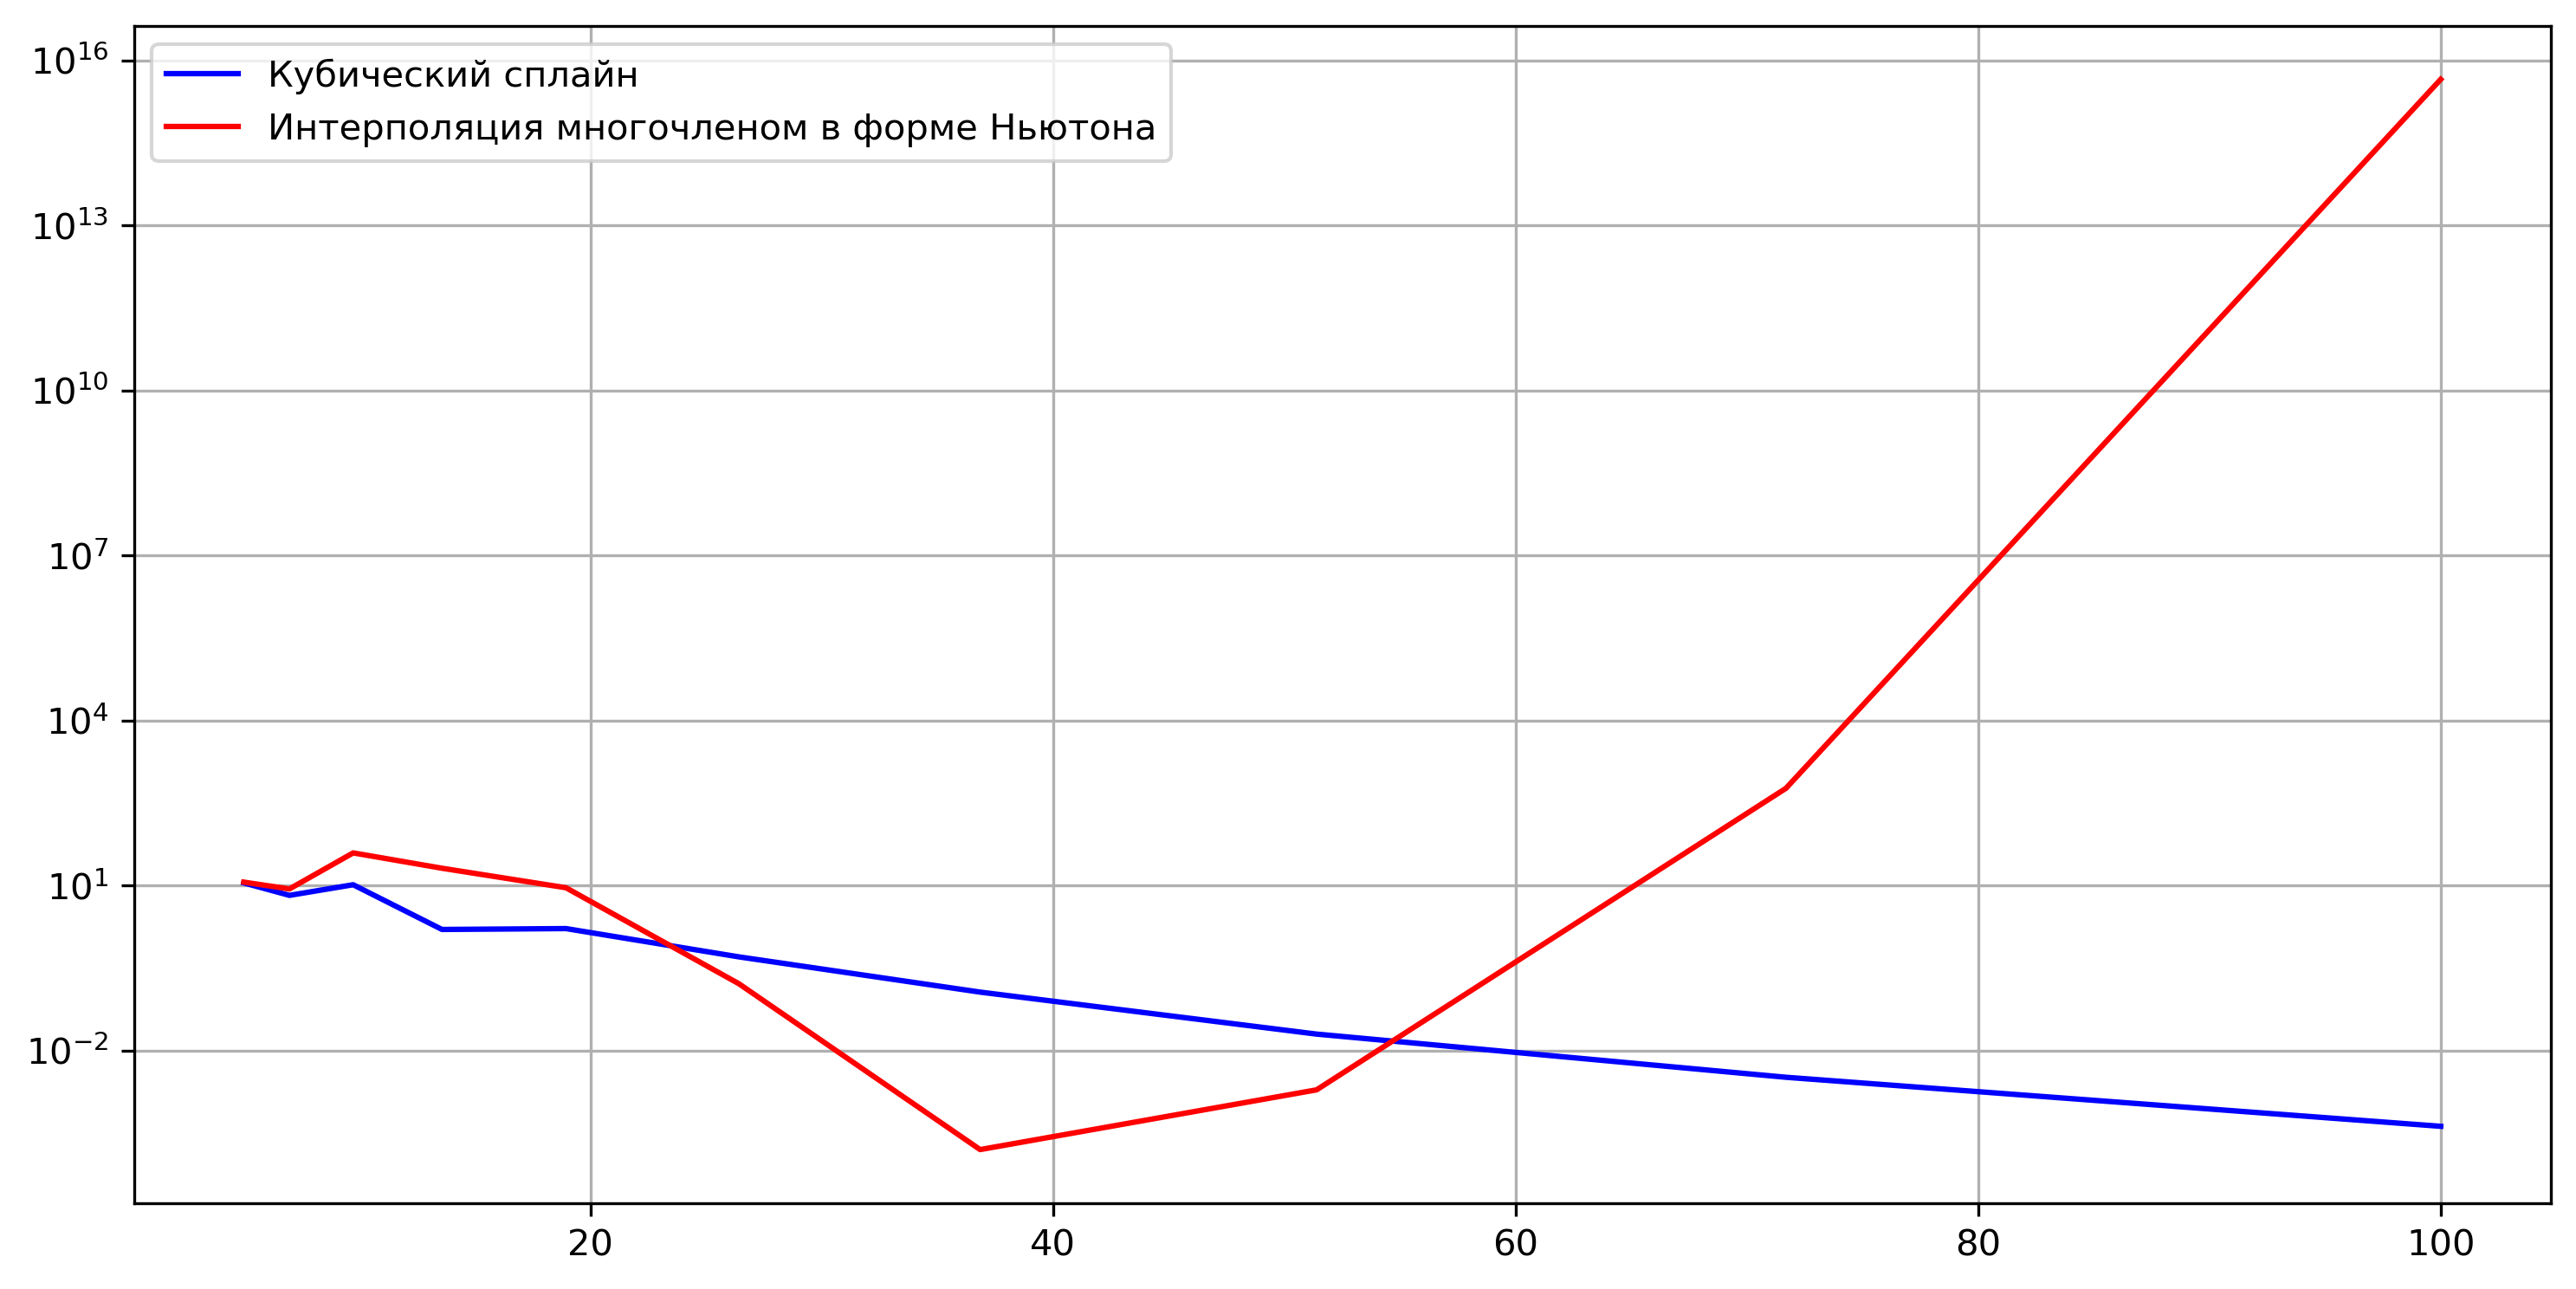

In [254]:
#4 На одном чертеже построим графики зависимости максимума отклонения интерполлирующих функций от истинной функции
# в зависимости от количества узлов интерполяции 

plt.figure(figsize = (12,6), dpi=300)

error_spline = []
error_newton = []

for i in np.logspace(np.log10(5), 2 ,  10):
    n = int(i)
    x_i = np.linspace(a,b,n)
    y_i = f(x_i)
    
    spline = cubic_spline()
    spline.fit(x_i, y_i)
    newton = newton_polynom(x_i,y_i)

    error_spline.append(np.max(np.abs(Y - spline.predict(X))))
    error_newton.append(np.max(np.abs(Y - newton.solve(X))))

plt.plot(np.logspace(np.log10(5), 2 ,  10), error_spline, color = 'blue', label = 'Кубический сплайн')
plt.plot(np.logspace(np.log10(5), 2 ,  10), error_newton, color = 'red', label = 'Интерполяция многочленом в форме Ньютона')
plt.yscale('log')
plt.grid()
plt.legend();

### Вывод: 

Из графика выше можно заметить, что отклонение кубического сплана уменьшается при увеличении количества узлов интерполяции. Для интерполяции многочленом в форме Ньютона минимальное отклонение достигается примерно при 35-38 узлах интерполяции, при дальнейшнем увеличении узлов погрешность увеличивается.